<a href="https://colab.research.google.com/github/ahanmisim/machine-learning/blob/main/customer_segmentation_and_personal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# Load the data into a DataFrame
df = pd.read_csv('C:/Users/PC-WROLD/Documents/My Desertation/Online_Advertising_Data_UK.csv')

In [ ]:
# Display the first few rows of the dataframe
df.head(8)

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,AdSize,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser
0,62,Female,London,Secondary,0.705780,6319,155,0.097799,Video,Food,Large,High,Rare,Complex,Evening,Tablet,Edge
1,18,Male,London,Secondary,0.621428,4325,243,0.607549,Text,Sports,Medium,Medium,Frequent,Simple,Evening,Tablet,Chrome
2,21,Female,Manchester,Secondary,0.964882,5341,275,0.367844,Text,Fashion,Medium,Medium,Frequent,Complex,Night,Mobile,Opera
3,21,Male,Glasgow,Secondary,0.646456,3069,74,0.995714,Text,Sports,Small,High,Moderate,Simple,Afternoon,Mobile,Opera
4,57,Male,Birmingham,Post-secondary,0.141314,6530,271,0.820659,Image,Sports,Small,Medium,Moderate,Complex,Morning,Tablet,Opera
5,27,Other,London,Secondary,0.161218,1211,72,0.926478,Text,Sports,Large,High,Moderate,Moderate,Night,Desktop,Firefox
6,37,Other,Manchester,Post-secondary,0.093067,4984,9,0.180463,Text,Food,Medium,NaN,Frequent,Complex,Afternoon,Desktop,Firefox
7,39,Female,Birmingham,Post-secondary,0.191174,5013,185,0.624730,Image,Food,Large,Low,Rare,Complex,Morning,Mobile,Edge


In [ ]:
df.isna().sum()/len(df)*100

Age                        0.0
Gender                     0.0
Location                   0.0
EducationLevel             0.0
ClickThroughRate           0.0
Impressions                0.0
EngagementTime             0.0
BounceRate                 0.0
AdType                     0.0
ContentTopic               0.0
AdSize                     0.0
PurchaseHistory           28.3
BrowsingBehavior           0.0
SiteNavigationPatterns     0.0
TimeOfDay                  0.0
DeviceUsed                 0.0
InternetBrowser            0.0
dtype: float64

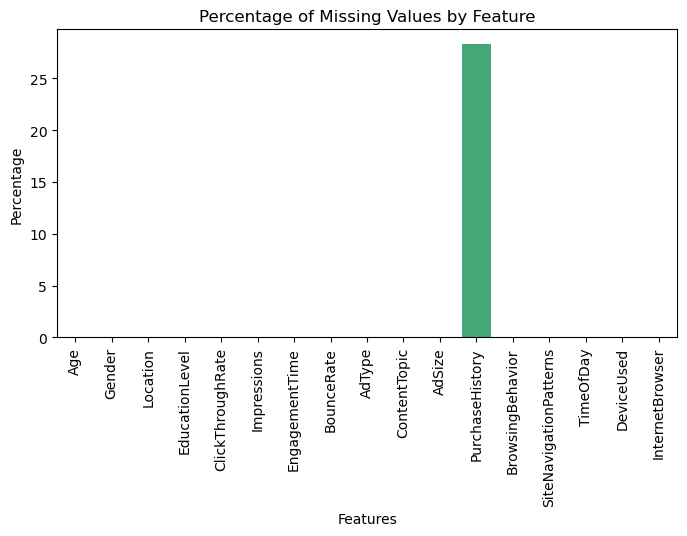

In [ ]:
missing_values = df.isna().sum() / len(df) * 100
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Drop rows with NaN values
df = df.dropna(subset=['PurchaseHistory'])

df.head()

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,AdSize,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser
0,62,Female,London,Secondary,0.705780,6319,155,0.097799,Video,Food,Large,High,Rare,Complex,Evening,Tablet,Edge
1,18,Male,London,Secondary,0.621428,4325,243,0.607549,Text,Sports,Medium,Medium,Frequent,Simple,Evening,Tablet,Chrome
2,21,Female,Manchester,Secondary,0.964882,5341,275,0.367844,Text,Fashion,Medium,Medium,Frequent,Complex,Night,Mobile,Opera
3,21,Male,Glasgow,Secondary,0.646456,3069,74,0.995714,Text,Sports,Small,High,Moderate,Simple,Afternoon,Mobile,Opera
4,57,Male,Birmingham,Post-secondary,0.141314,6530,271,0.820659,Image,Sports,Small,Medium,Moderate,Complex,Morning,Tablet,Opera


In [ ]:
df.isna().sum()/len(df)*100

Age                       0.0
Gender                    0.0
Location                  0.0
EducationLevel            0.0
ClickThroughRate          0.0
Impressions               0.0
EngagementTime            0.0
BounceRate                0.0
AdType                    0.0
ContentTopic              0.0
AdSize                    0.0
PurchaseHistory           0.0
BrowsingBehavior          0.0
SiteNavigationPatterns    0.0
TimeOfDay                 0.0
DeviceUsed                0.0
InternetBrowser           0.0
dtype: float64

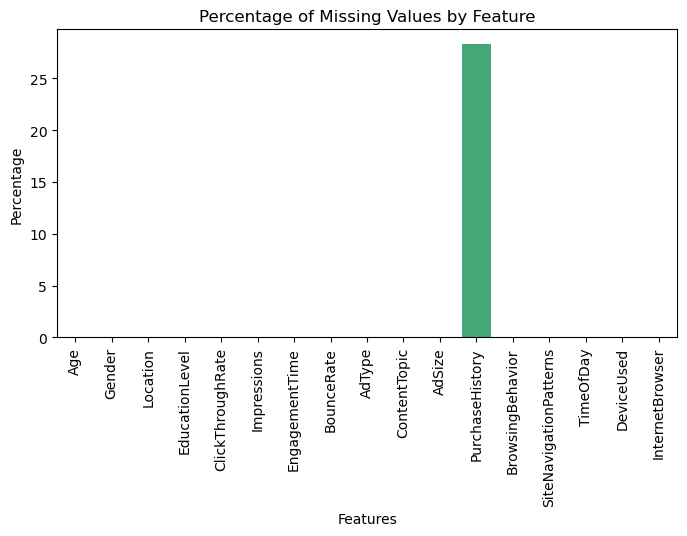

In [ ]:
df.isna().sum() / len(df) * 100
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

# **Data Preprocessing**

In [ ]:
# Preprocess categorical variables
categorical_columns = [
    'Gender', 'Location', 'EducationLevel', 'AdType', 'ContentTopic', 'AdSize',
    'PurchaseHistory', 'BrowsingBehavior', 'SiteNavigationPatterns', 'TimeOfDay',
    'DeviceUsed', 'InternetBrowser'
]

df_encoded = df.copy()

# Encoding categorical variables
label_encoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoder[col] = le

In [ ]:
df_encoded.head(15)

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,AdSize,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser
0,62,0,3,1,0.705780,6319,155,0.097799,2,1,0,0,2,0,1,2,1
1,18,1,3,1,0.621428,4325,243,0.607549,1,2,1,2,0,2,1,2,0
2,21,0,4,1,0.964882,5341,275,0.367844,1,0,1,2,0,0,3,1,3
3,21,1,1,1,0.646456,3069,74,0.995714,1,2,2,0,1,2,0,1,3
4,57,1,0,0,0.141314,6530,271,0.820659,0,2,2,2,1,0,2,2,3
5,27,2,3,1,0.161218,1211,72,0.926478,1,2,0,0,1,1,3,0,2
7,39,0,0,0,0.191174,5013,185,0.624730,0,1,0,1,2,0,2,1,1
8,54,2,0,0,0.597951,5100,65,0.027877,2,0,1,2,2,0,2,0,3
9,41,1,0,1,0.838286,4516,227,0.735142,2,2,1,2,2,1,0,2,2
10,24,0,2,1,0.893868,6150,16,0.042222,0,0,2,2,1,0,2,1,3


In [ ]:
# Statistics Description of the dataset
print(df_encoded.describe())

              Age      Gender    Location  EducationLevel  ClickThroughRate  \
count  717.000000  717.000000  717.000000      717.000000        717.000000   
mean    40.806137    0.977685    1.973501        0.701534          0.483095   
std     13.733398    0.820174    1.406537        0.457904          0.286934   
min     18.000000    0.000000    0.000000        0.000000          0.000072   
25%     29.000000    0.000000    1.000000        0.000000          0.231914   
50%     41.000000    1.000000    2.000000        1.000000          0.476644   
75%     53.000000    2.000000    3.000000        1.000000          0.728465   
max     64.000000    2.000000    4.000000        1.000000          0.999931   

       Impressions  EngagementTime  BounceRate      AdType  ContentTopic  \
count   717.000000      717.000000  717.000000  717.000000    717.000000   
mean   5241.622036      156.679219    0.477769    0.976290      1.981869   
std    2799.175939       82.620407    0.286063    0.815867  

# **Exploratory Data Analysis**

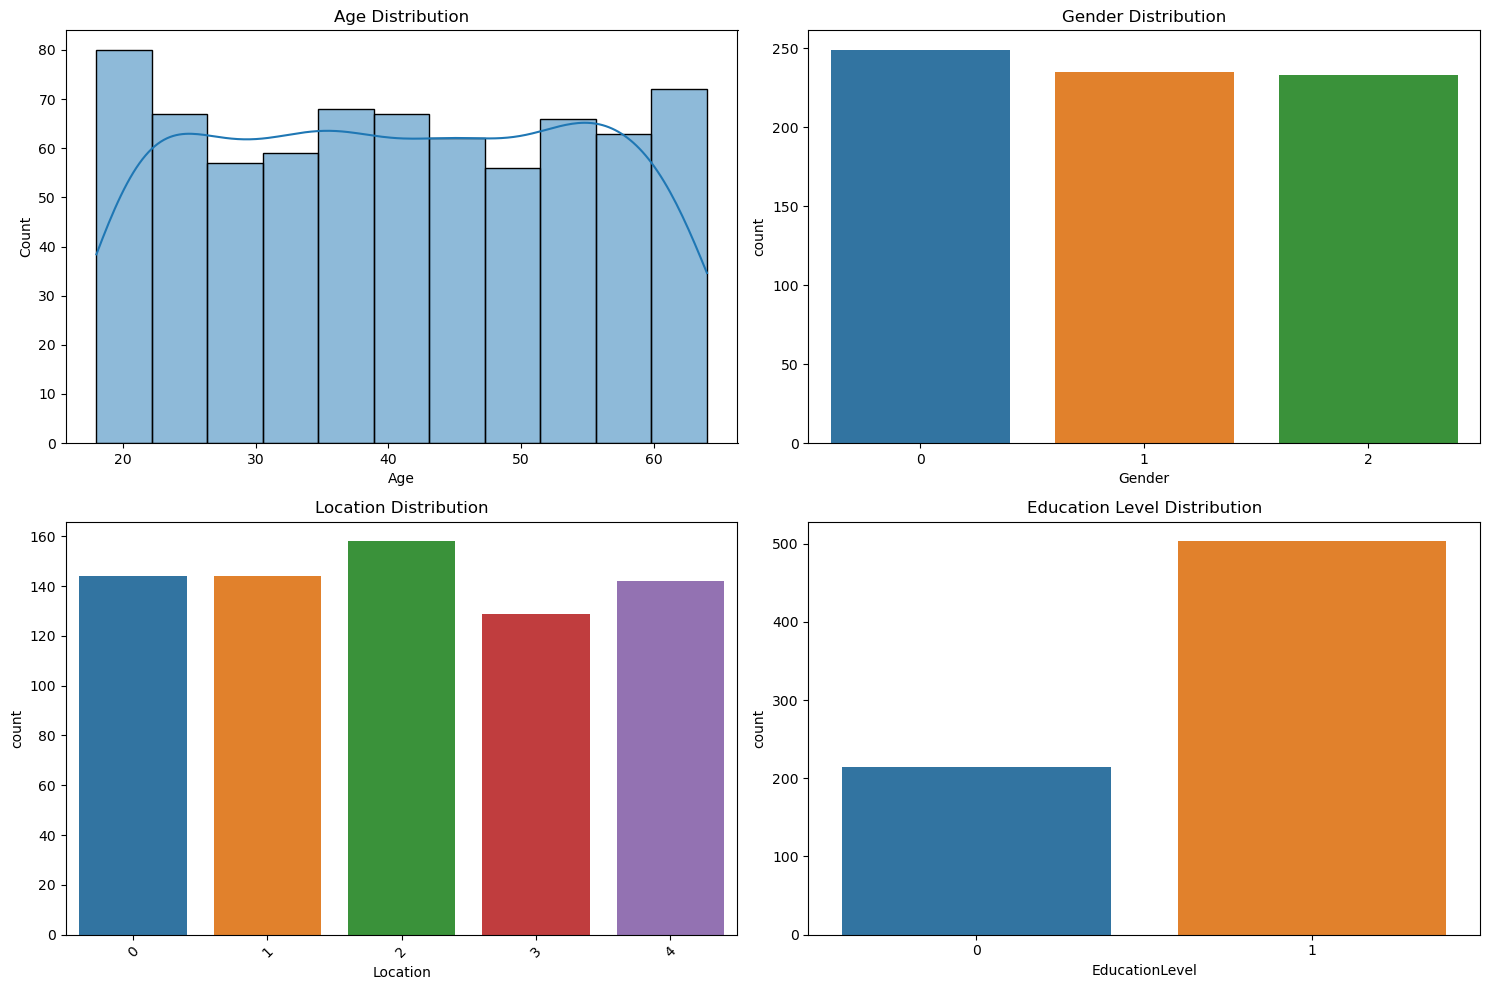

In [ ]:
# Set up the visualizations for demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
sns.histplot(df_encoded['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Gender distribution
sns.countplot(x='Gender', data=df_encoded, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Location distribution
sns.countplot(x='Location', data=df_encoded, ax=axes[1, 0])
axes[1, 0].set_title('Location Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Education Level distribution
sns.countplot(x='EducationLevel', data=df_encoded, ax=axes[1, 1])
axes[1, 1].set_title('Education Level Distribution')

plt.tight_layout()
plt.show()

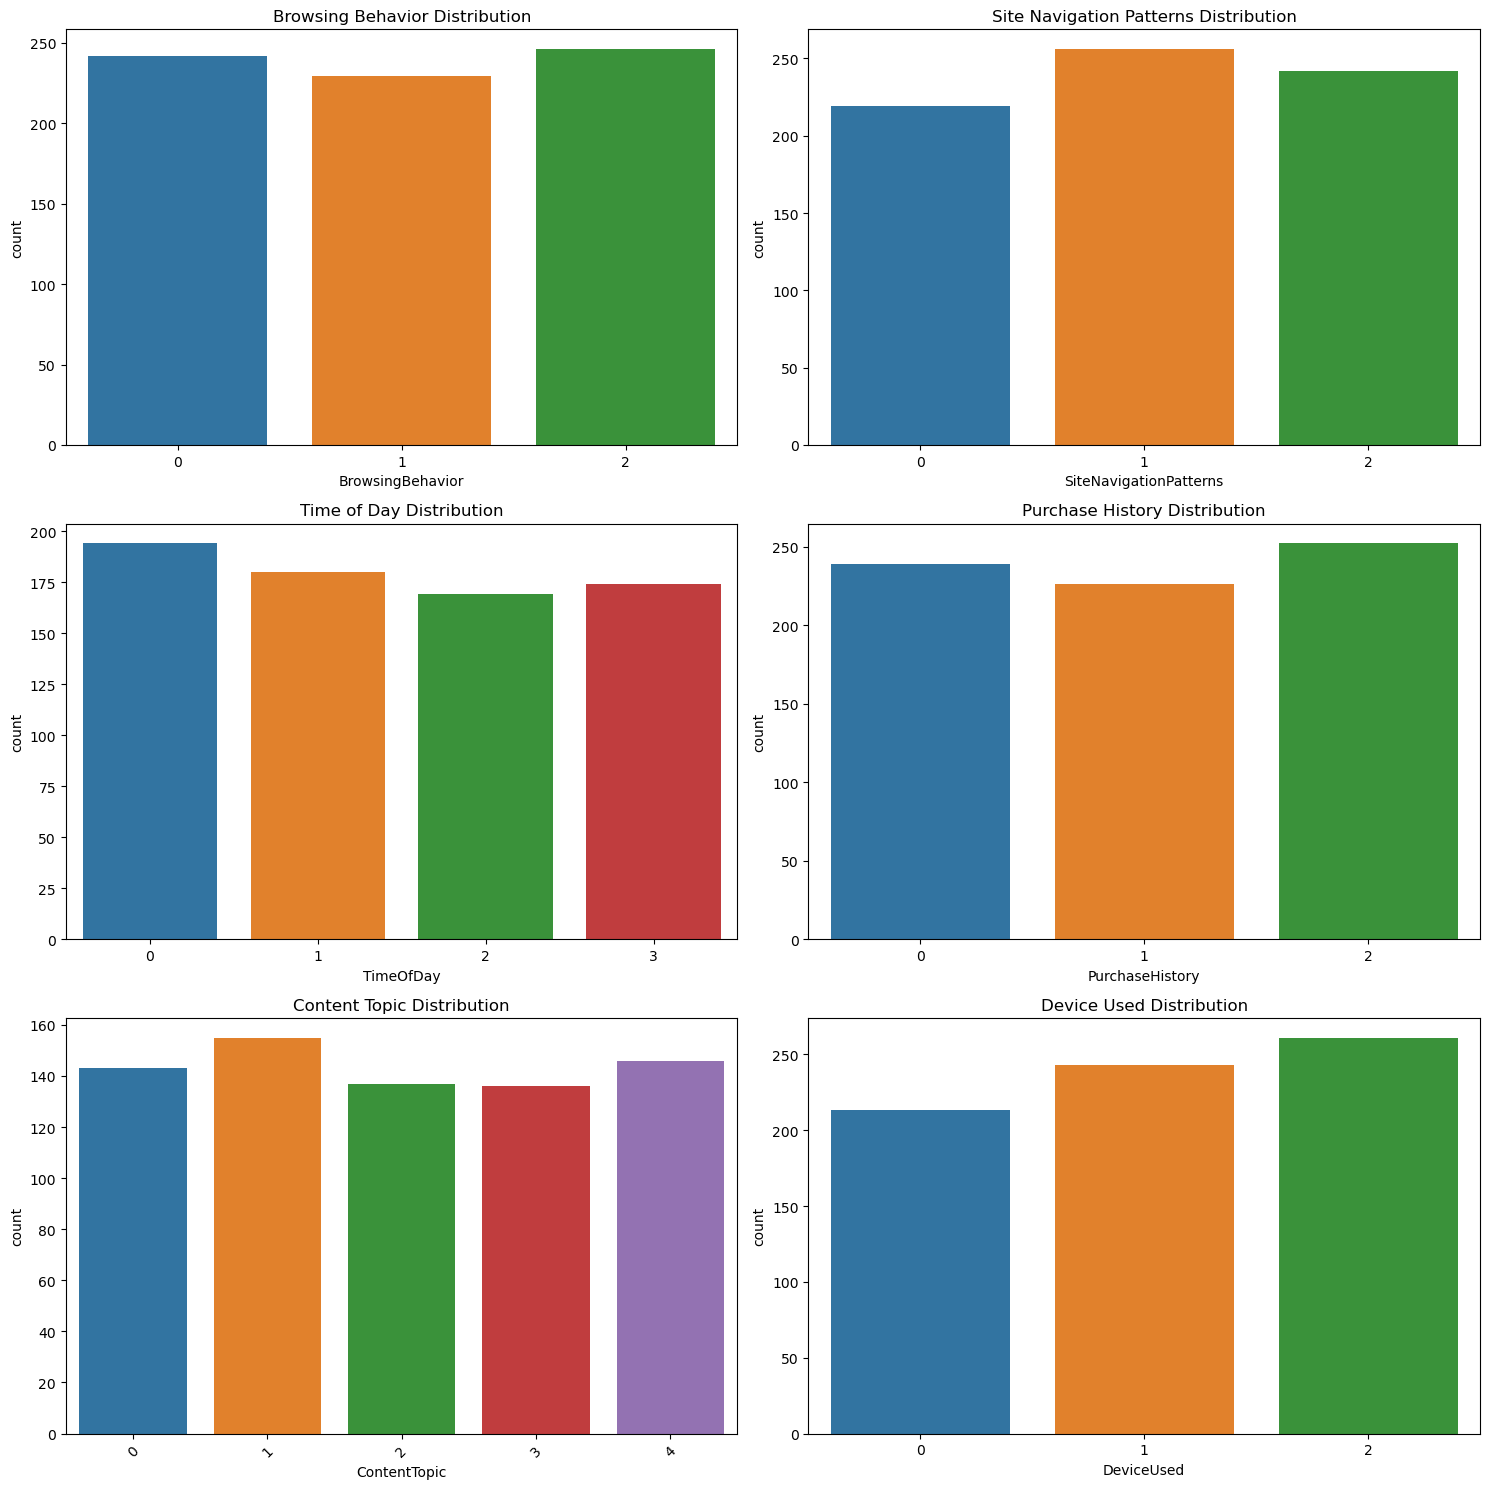

In [ ]:
# Set up the visualizations for behavioral and psychographic patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Browsing Behavior distribution
sns.countplot(x='BrowsingBehavior', data=df_encoded, ax=axes[0, 0])
axes[0, 0].set_title('Browsing Behavior Distribution')

# Site Navigation Patterns distribution
sns.countplot(x='SiteNavigationPatterns', data=df_encoded, ax=axes[0, 1])
axes[0, 1].set_title('Site Navigation Patterns Distribution')

# Time of Day distribution
sns.countplot(x='TimeOfDay', data=df_encoded, ax=axes[1, 0])
axes[1, 0].set_title('Time of Day Distribution')

# Purchase History distribution
sns.countplot(x='PurchaseHistory', data=df_encoded, ax=axes[1, 1])
axes[1, 1].set_title('Purchase History Distribution')

# Content Topic distribution
sns.countplot(x='ContentTopic', data=df_encoded, ax=axes[2, 0])
axes[2, 0].set_title('Content Topic Distribution')
axes[2, 0].tick_params(axis='x', rotation=45)

# Device Used distribution
sns.countplot(x='DeviceUsed', data=df_encoded, ax=axes[2, 1])
axes[2, 1].set_title('Device Used Distribution')

plt.tight_layout()
plt.show()

# **Customer Segmentation and Personalisation**

# Standardisation

In [ ]:
# Features Standardization

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Check the scaled features
print(df_scaled[:5])

[[ 1.54431252 -1.19287746  0.73031544  0.65226323  0.7766275   0.38515981
  -0.02033869 -1.32920065  1.25562762 -0.69121665 -1.25707508 -1.23062803
   1.20539662 -1.28815904 -0.39910805  1.15147493 -0.72588711]
 [-1.66179246  0.02722688  0.73031544  0.65226323  0.48244268 -0.32768998
   1.045517    0.45399516  0.02908129  0.01276394 -0.01387117  1.18679744
  -1.21892141  1.20808429 -0.39910805  1.15147493 -1.44080615]
 [-1.4431944  -1.19287746  1.44177763  0.65226323  1.68025885  0.03552736
   1.43310089 -0.38453455  0.02908129 -1.39519724 -0.01387117  1.18679744
  -1.21892141 -1.28815904  1.37278343 -0.08261704  0.70395097]
 [-1.4431944   0.02722688 -0.69260894  0.65226323  0.56972999 -0.7767067
  -1.00141042  1.81186681  0.02908129  0.01276394  1.22933273 -1.23062803
  -0.00676239  1.20808429 -1.2850538  -0.08261704  0.70395097]
 [ 1.1799824   0.02722688 -1.40407112 -1.53312338 -1.19198017  0.46059175
   1.38465291  1.19949242 -1.19746503  0.01276394  1.22933273  1.18679744
  -0.0067

In [ ]:
# Applying PCA to reduce dimensions for easier visualisation

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


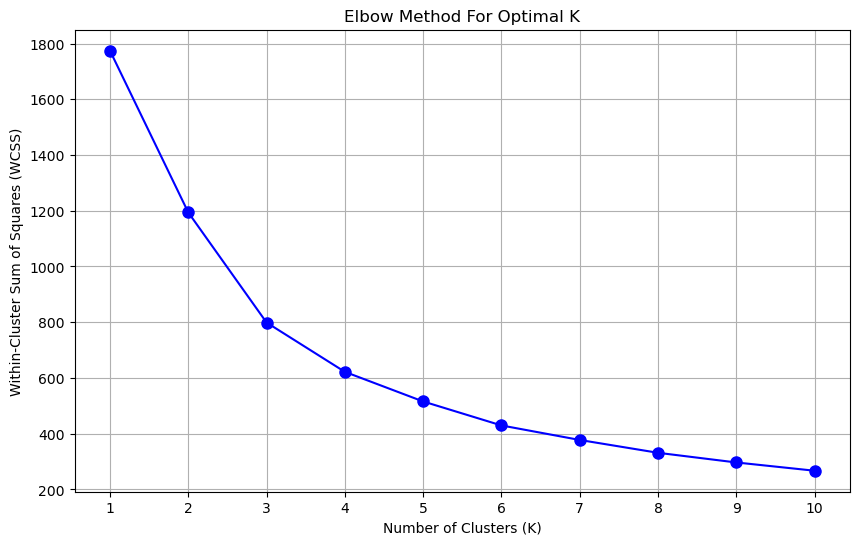

In [ ]:
# Determine the WCSS for a range of K values

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_pca)

In [ ]:
# Add PCA components to the original dataframe for visualization
df_encoded['PCA1'] = df_pca[:, 0]
df_encoded['PCA2'] = df_pca[:, 1]

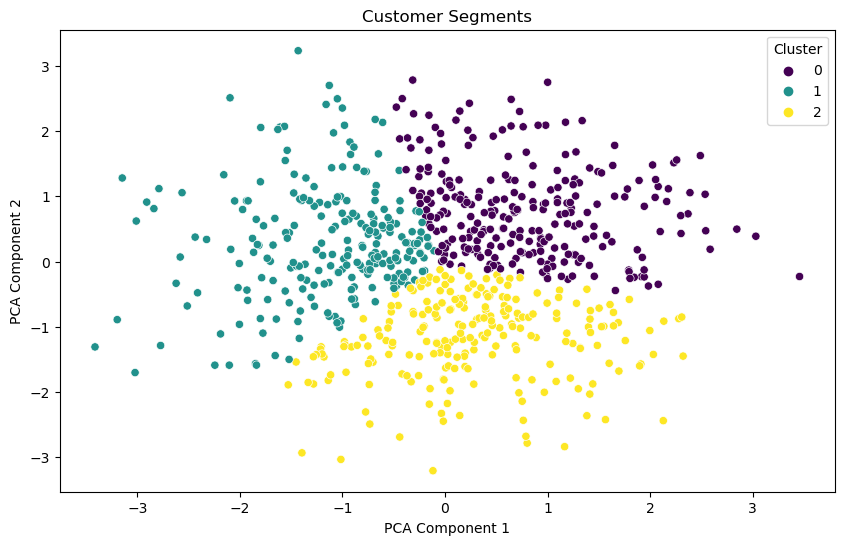

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_encoded, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Profile each cluster
cluster_0 = df_encoded[df_encoded['Cluster'] == 0]
cluster_1 = df_encoded[df_encoded['Cluster'] == 1]
cluster_2 = df_encoded[df_encoded['Cluster'] == 2]

# Summarize key characteristics for each cluster
summary_cluster_0 = cluster_0.describe(include='all')
summary_cluster_1 = cluster_1.describe(include='all')
summary_cluster_2 = cluster_2.describe(include='all')

# **Descriptive Stastistics for Clusters**

In [ ]:
# Analyze cluster characteristics
# Filter out non-numeric columns
numeric_columns = df_encoded.select_dtypes(include=['number']).columns
df_numeric = df_encoded[numeric_columns]

# Group by 'Cluster' and calculate the mean
cluster_summary = df_numeric.groupby(df_encoded['Cluster']).mean()

# Display the summary
print(cluster_summary)

               Age    Gender  Location  EducationLevel  ClickThroughRate  \
Cluster                                                                    
0        38.773438  0.789062  1.589844        0.589844          0.581881   
1        39.772532  1.472103  2.248927        0.785408          0.315101   
2        44.144737  0.684211  2.122807        0.741228          0.543856   

         Impressions  EngagementTime  BounceRate    AdType  ContentTopic  \
Cluster                                                                    
0        6511.867188      160.214844    0.414454  0.742188      1.785156   
1        4670.304721      136.227468    0.542796  1.257511      1.583691   
2        4399.228070      173.609649    0.482404  0.951754      2.609649   

           AdSize  PurchaseHistory  BrowsingBehavior  SiteNavigationPatterns  \
Cluster                                                                        
0        1.246094         1.304688          0.781250                1.218750  

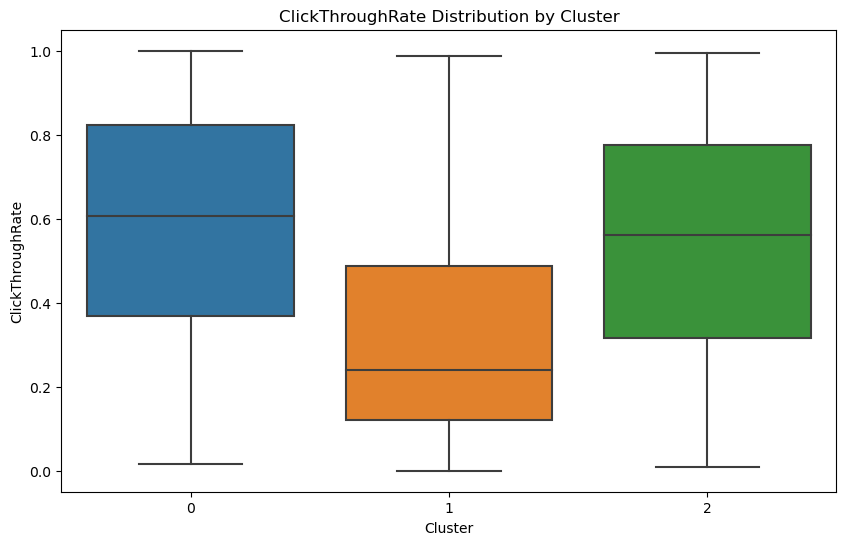

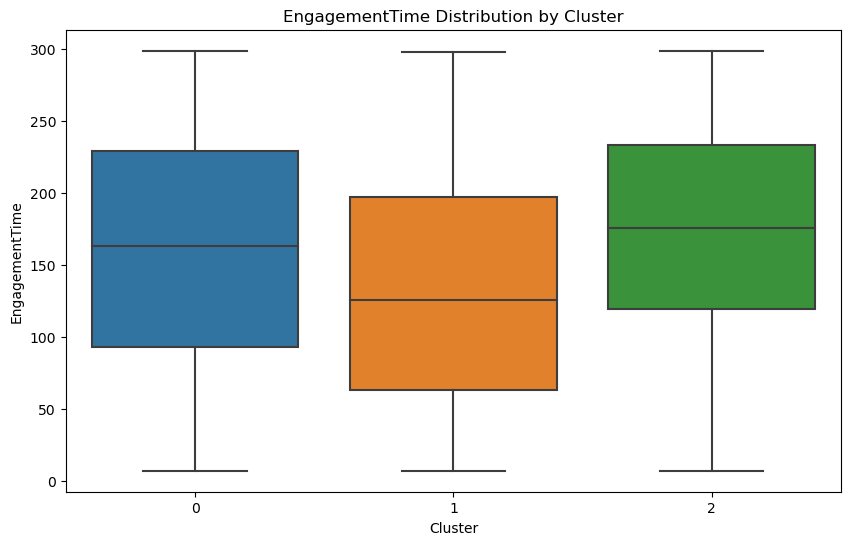

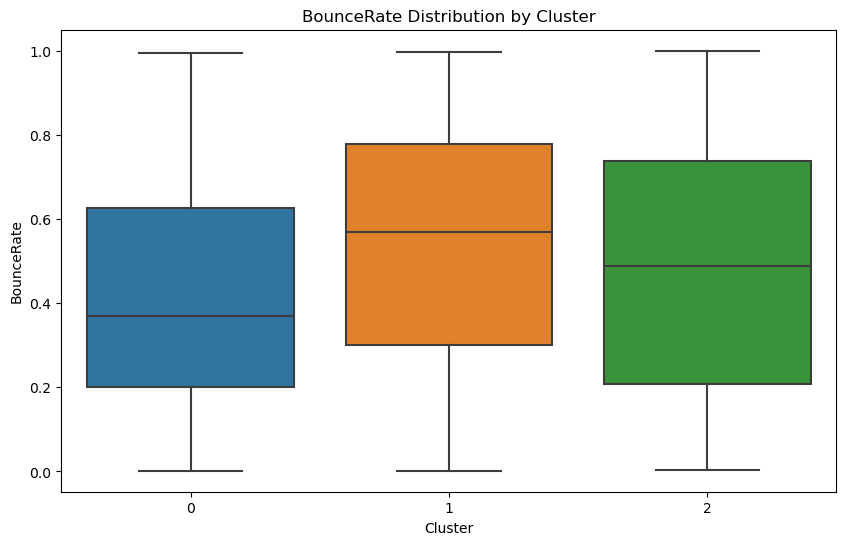

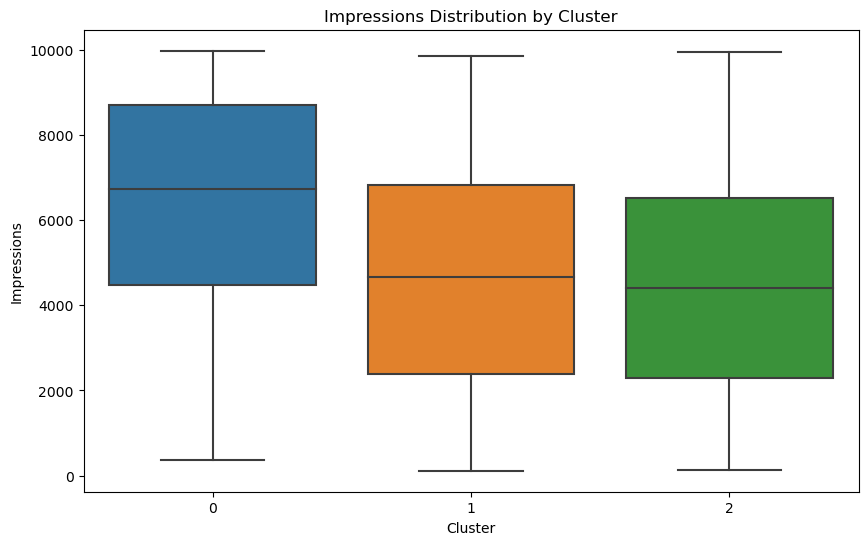

In [ ]:
# Visualizing cluster characteristics
for feature in ['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_encoded)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

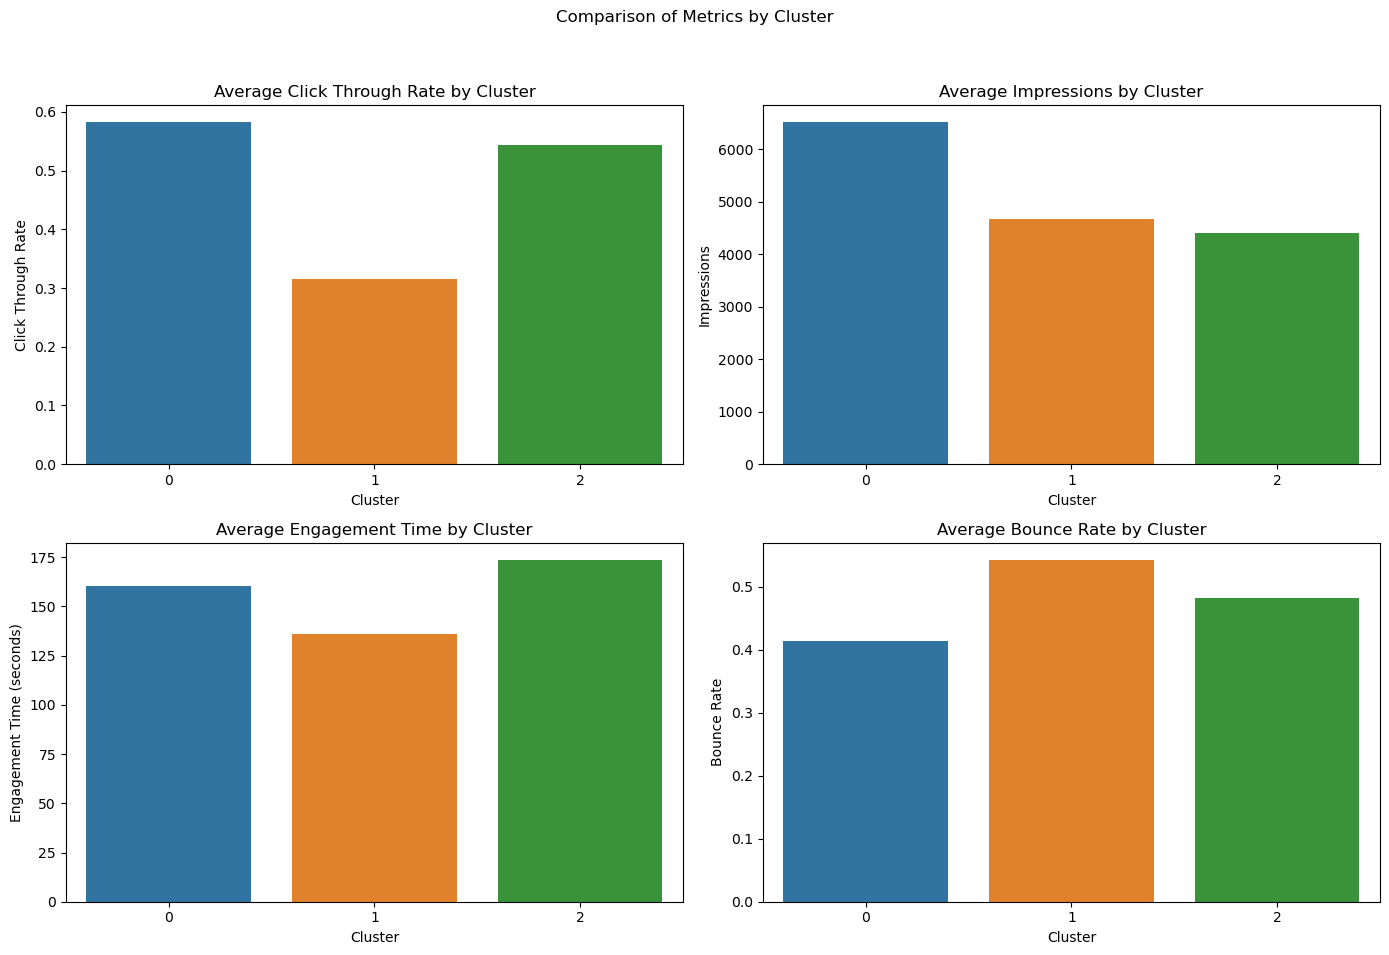

In [ ]:
# Plot the comparison using bar plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Metrics by Cluster')

# Click Through Rate
sns.barplot(ax=axes[0, 0], x=cluster_summary.index, y='ClickThroughRate', data=cluster_summary)
axes[0, 0].set_title('Average Click Through Rate by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Click Through Rate')

# Impressions
sns.barplot(ax=axes[0, 1], x=cluster_summary.index, y='Impressions', data=cluster_summary)
axes[0, 1].set_title('Average Impressions by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Impressions')

# Engagement Time
sns.barplot(ax=axes[1, 0], x=cluster_summary.index, y='EngagementTime', data=cluster_summary)
axes[1, 0].set_title('Average Engagement Time by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Engagement Time (seconds)')

# Bounce Rate
sns.barplot(ax=axes[1, 1], x=cluster_summary.index, y='BounceRate', data=cluster_summary)
axes[1, 1].set_title('Average Bounce Rate by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Bounce Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Summary for Cluster_0

In [ ]:
summary_cluster_0

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,AdSize,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser,Cluster,PCA1,PCA2
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.0,256.000000,256.000000
mean,38.773438,0.789062,1.589844,0.589844,0.581881,6511.867188,160.214844,0.414454,0.742188,1.785156,1.246094,1.304688,0.781250,1.218750,1.214844,1.191406,2.578125,0.0,0.791912,0.779566
std,13.474283,0.798551,1.334216,0.492825,0.272024,2500.260234,83.921466,0.267632,0.769477,1.404731,0.750153,0.772656,0.820688,0.756022,1.146493,0.786207,1.287097,0.0,0.763068,0.699914
min,18.000000,0.000000,0.000000,0.000000,0.015356,369.000000,7.000000,0.001684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.474456,-0.443766
25%,27.000000,0.000000,0.000000,0.000000,0.368000,4485.750000,93.000000,0.200339,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.0,0.190686,0.217638
50%,38.000000,1.000000,1.000000,1.000000,0.605289,6726.500000,163.500000,0.368279,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,0.687204,0.735991
75%,50.250000,1.000000,3.000000,1.000000,0.823927,8700.000000,229.250000,0.625605,1.000000,3.000000,2.000000,2.000000,1.250000,2.000000,2.000000,2.000000,4.000000,0.0,1.244568,1.184350
max,64.000000,2.000000,4.000000,1.000000,0.999931,9986.000000,299.000000,0.994949,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,0.0,3.457052,2.779963


# Metrics Analysis by Cluster_0

## Click Through Rate by Demographic Group and Location

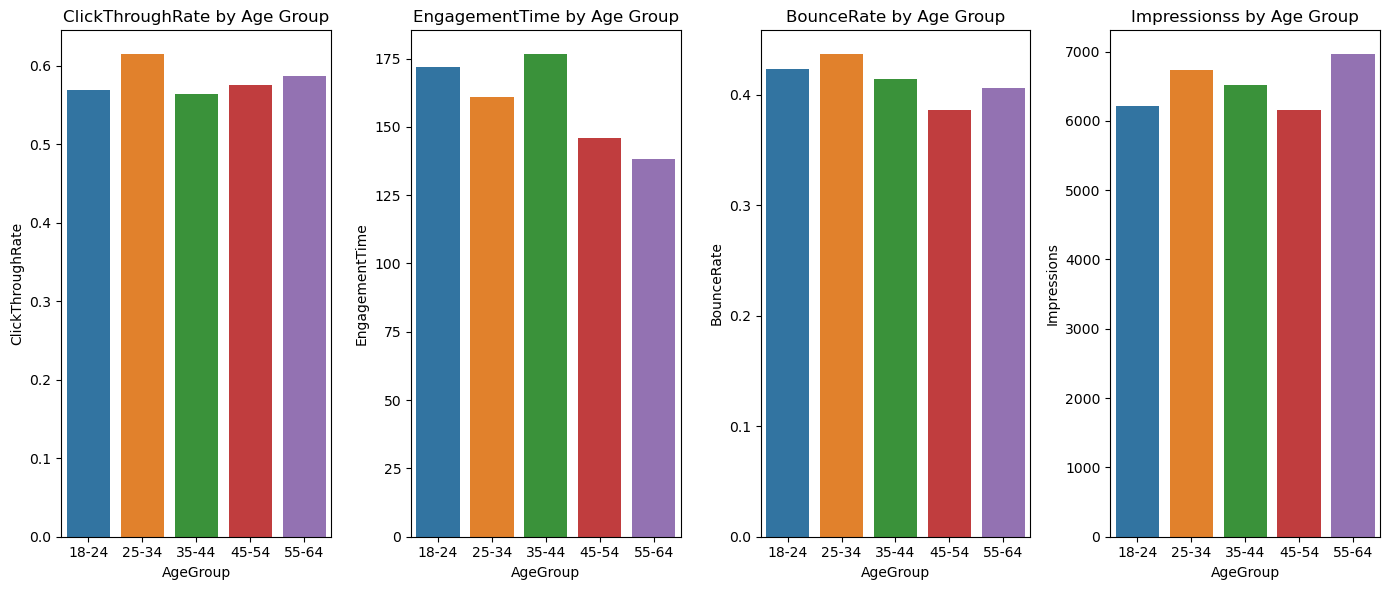

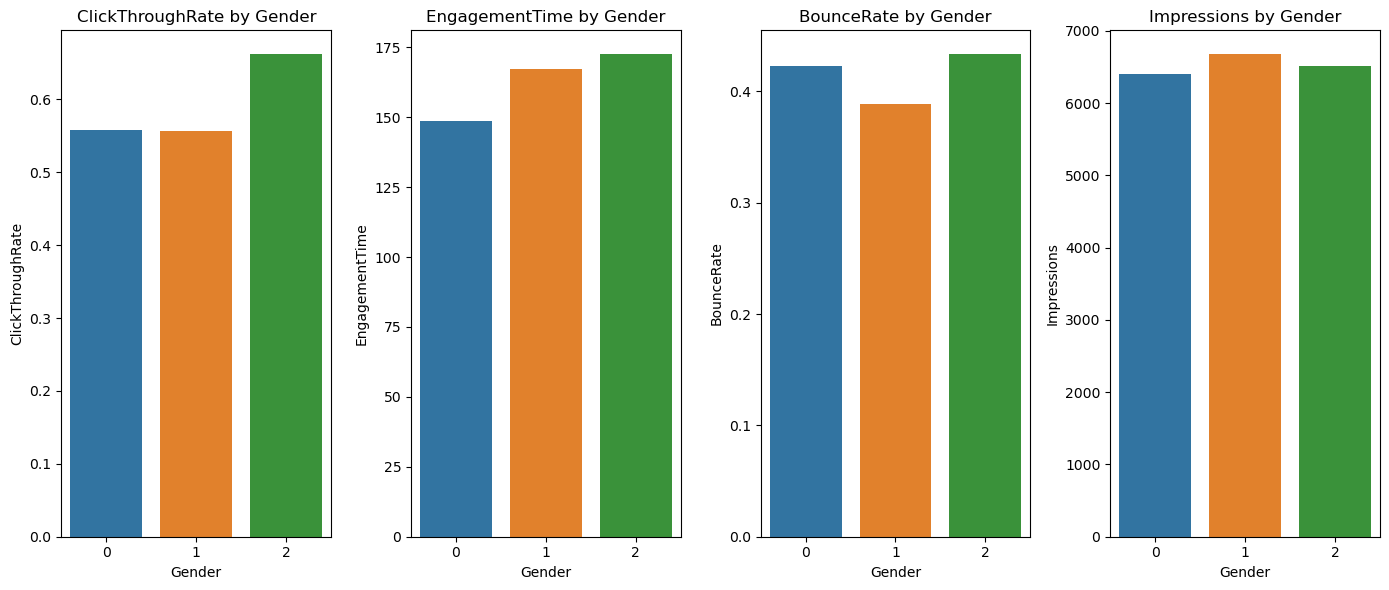

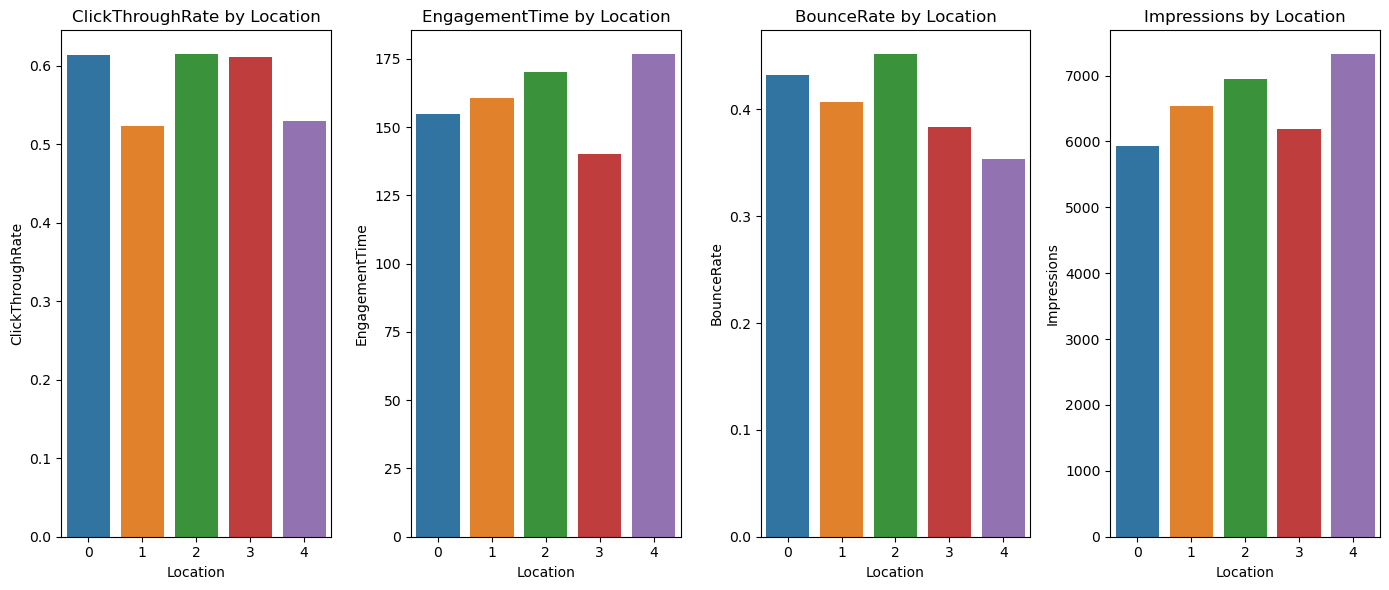

In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
cluster_0['AgeGroup'] = pd.cut(cluster_0['Age'], bins=bins, labels=labels, right=False)

# Demographic Preferences: ClickThroughRate, EngagementTime, BounceRate by Age Group
age_group_metrics = cluster_0.groupby('AgeGroup')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Gender-Based Analysis
gender_metrics = cluster_0.groupby('Gender')[['ClickThroughRate', 'EngagementTime', 'BounceRate', "Impressions"]].mean().reset_index()

# Geographic Preferences
location_metrics = cluster_0.groupby('Location')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Content Performance by Demographics (Age and Gender)
content_age_metrics = cluster_0.groupby(['ContentTopic', 'AgeGroup'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
content_gender_metrics = cluster_0.groupby(['ContentTopic', 'Gender'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Device and Time Impact
device_metrics = cluster_0.groupby('DeviceUsed')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
time_metrics = cluster_0.groupby('TimeOfDay')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# AdType and AdSize Impact
adtype_metrics = cluster_0.groupby('AdType')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
adsize_metrics = cluster_0.groupby('AdSize')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Plotting the results

# Age Group Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AgeGroup', y='ClickThroughRate', data=age_group_metrics, palette='tab10')
plt.title('ClickThroughRate by Age Group')
plt.subplot(1, 4, 2)
sns.barplot(x='AgeGroup', y='EngagementTime', data=age_group_metrics, palette='tab10')
plt.title('EngagementTime by Age Group')
plt.subplot(1, 4, 3)
sns.barplot(x='AgeGroup', y='BounceRate', data=age_group_metrics, palette='tab10')
plt.title('BounceRate by Age Group')
plt.subplot(1, 4, 4)
sns.barplot(x='AgeGroup', y='Impressions', data=age_group_metrics, palette='tab10')
plt.title('Impressionss by Age Group')
plt.tight_layout()
plt.show()

# Gender Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Gender', y='ClickThroughRate', data=gender_metrics, palette='tab10')
plt.title('ClickThroughRate by Gender')
plt.subplot(1, 4, 2)
sns.barplot(x='Gender', y='EngagementTime', data=gender_metrics, palette='tab10')
plt.title('EngagementTime by Gender')
plt.subplot(1, 4, 3)
sns.barplot(x='Gender', y='BounceRate', data=gender_metrics, palette='tab10')
plt.title('BounceRate by Gender')
plt.subplot(1, 4, 4)
sns.barplot(x='Gender', y='Impressions', data=gender_metrics, palette='tab10')
plt.title('Impressions by Gender')
plt.tight_layout()
plt.show()

# Location Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Location', y='ClickThroughRate', data=location_metrics, palette='tab10')
plt.title('ClickThroughRate by Location')
plt.subplot(1, 4, 2)
sns.barplot(x='Location', y='EngagementTime', data=location_metrics, palette='tab10')
plt.title('EngagementTime by Location')
plt.subplot(1, 4, 3)
sns.barplot(x='Location', y='BounceRate', data=location_metrics, palette='tab10')
plt.title('BounceRate by Location')
plt.subplot(1, 4, 4)
sns.barplot(x='Location', y='Impressions', data=location_metrics, palette='tab10')
plt.title('Impressions by Location')
plt.tight_layout()
plt.show()



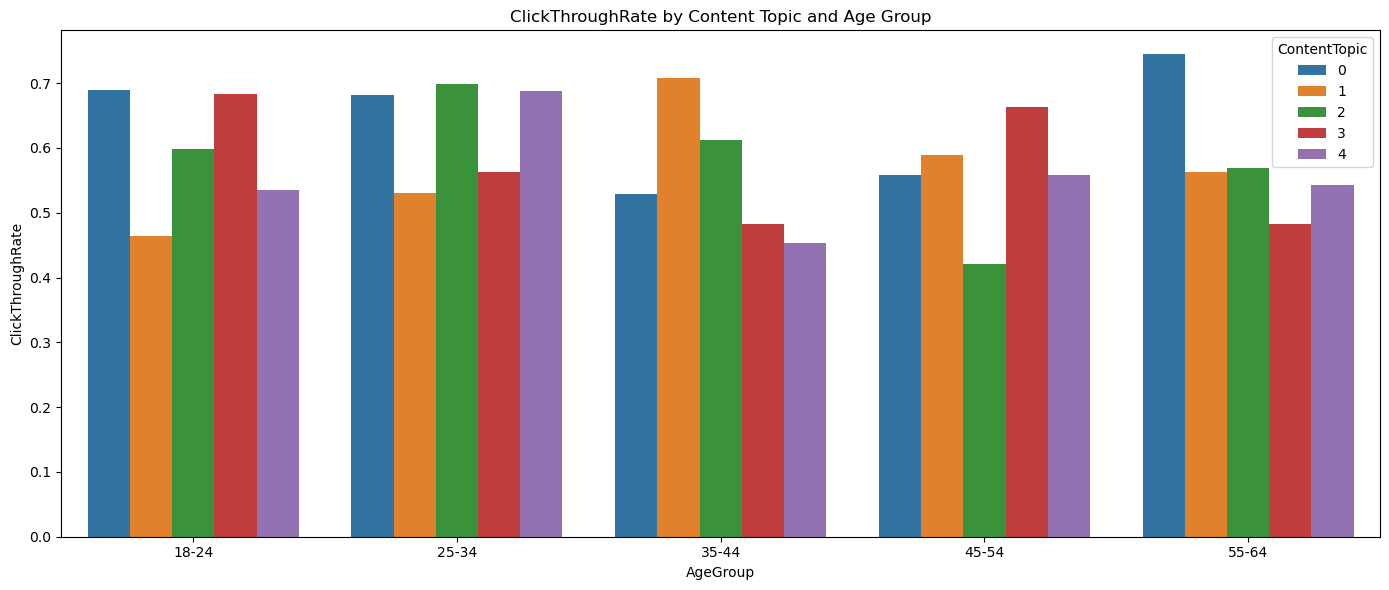

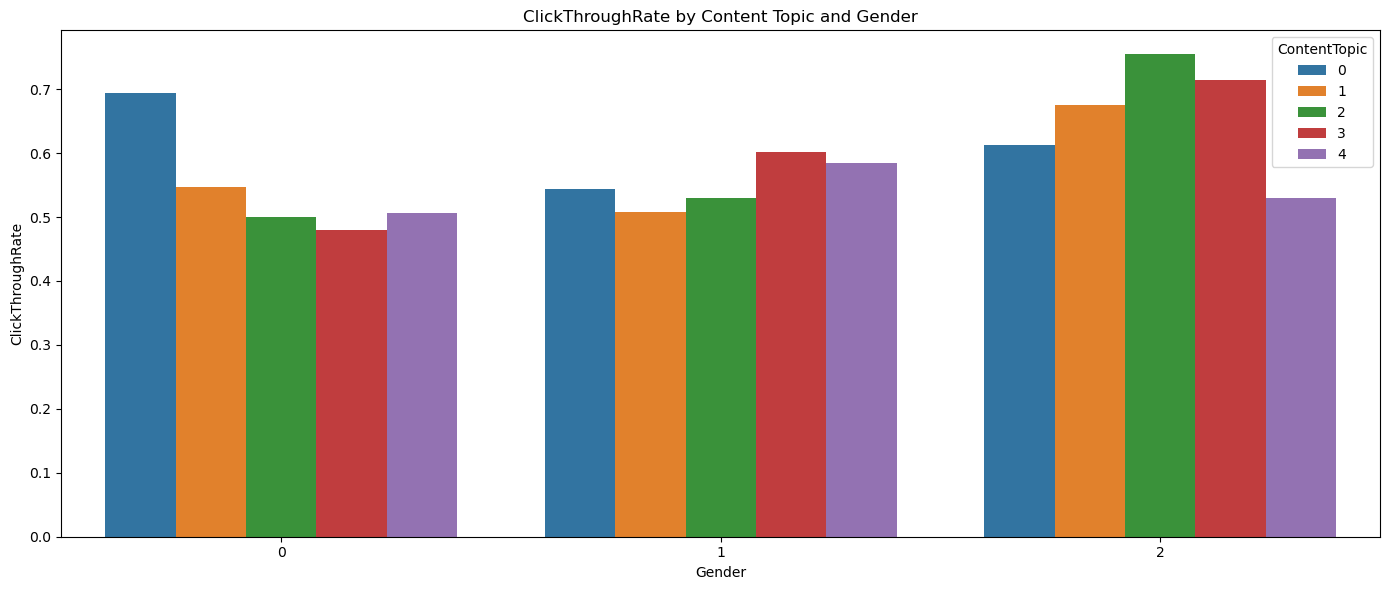

In [ ]:
# Content Performance by Age Group
plt.figure(figsize=(14, 6))
sns.barplot(x='AgeGroup', y='ClickThroughRate', hue='ContentTopic', data=content_age_metrics, palette='tab10')
plt.title('ClickThroughRate by Content Topic and Age Group')
plt.tight_layout()
plt.show()

# Content Performance by Gender
plt.figure(figsize=(14, 6))
sns.barplot(x='Gender', y='ClickThroughRate', hue='ContentTopic', data=content_gender_metrics, palette='tab10')
plt.title('ClickThroughRate by Content Topic and Gender')
plt.tight_layout()
plt.show()


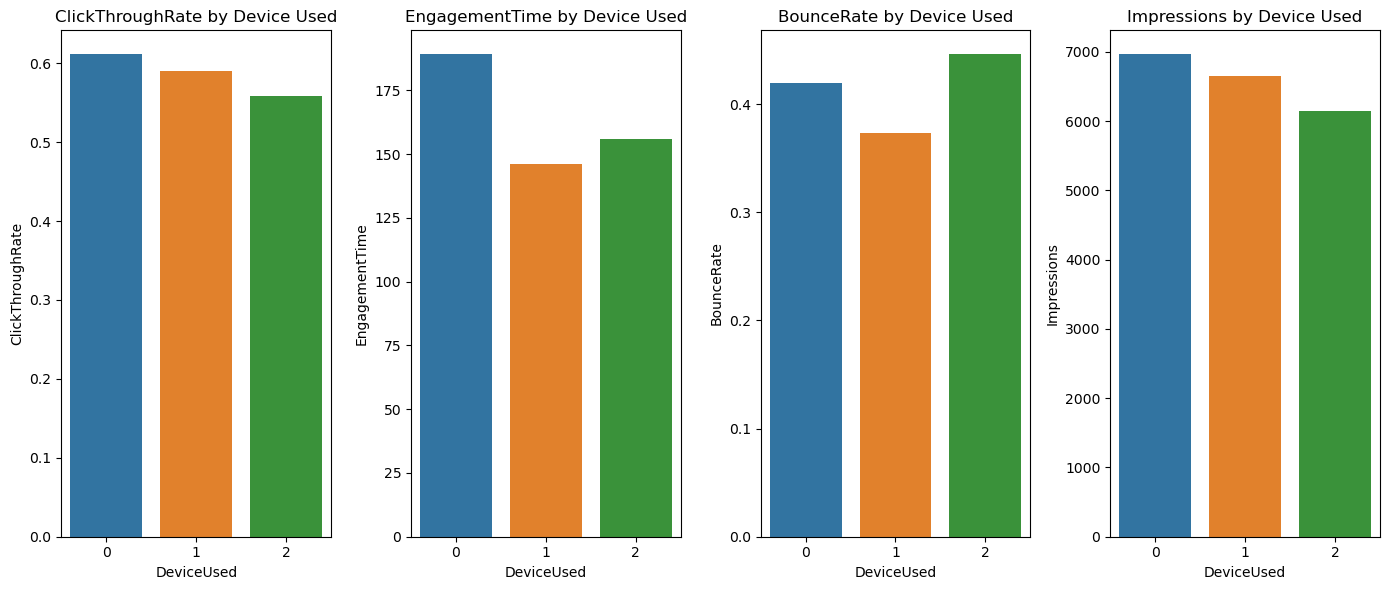

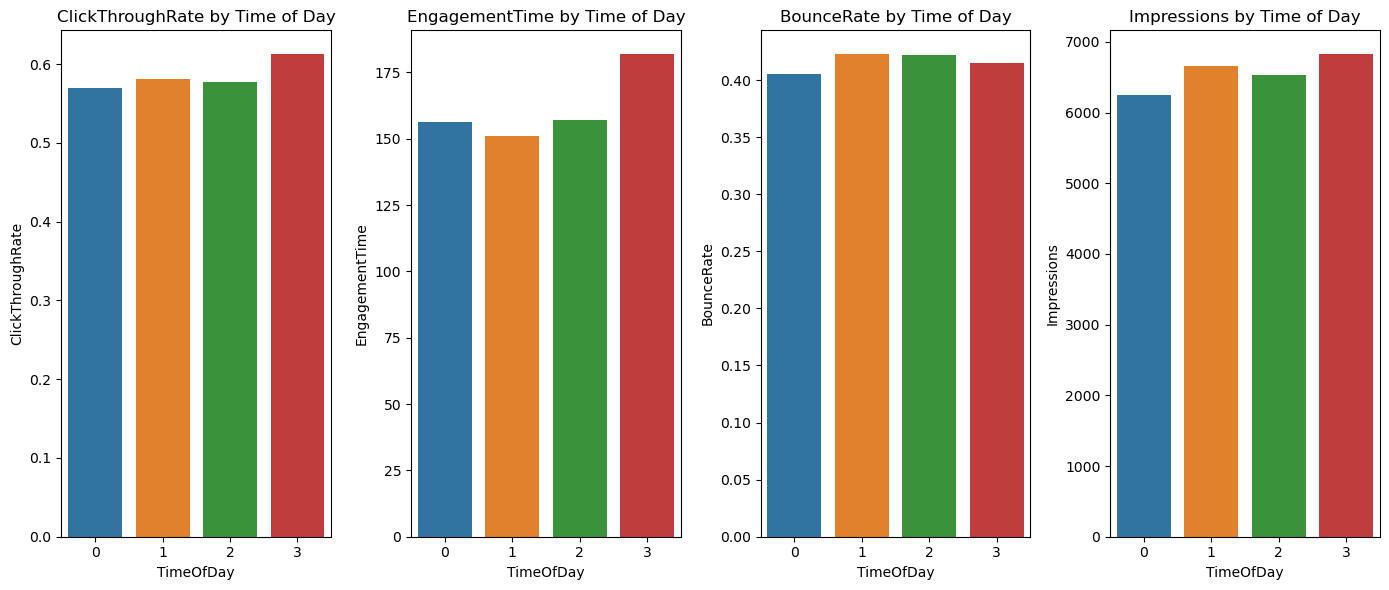

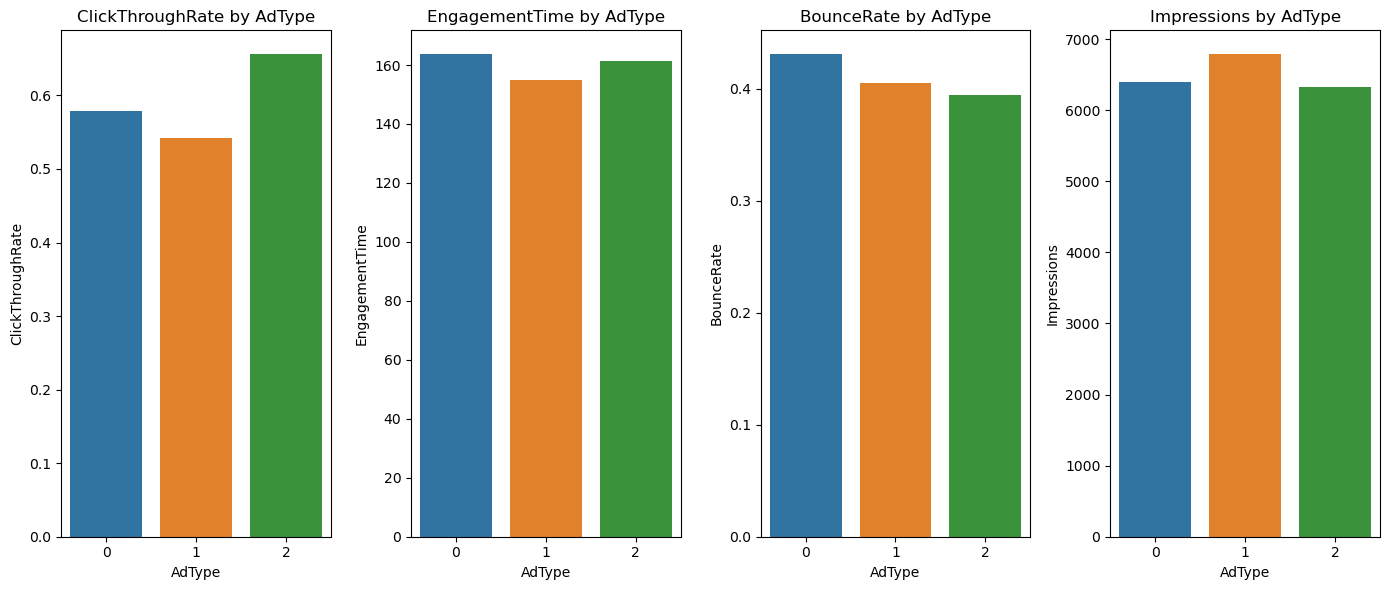

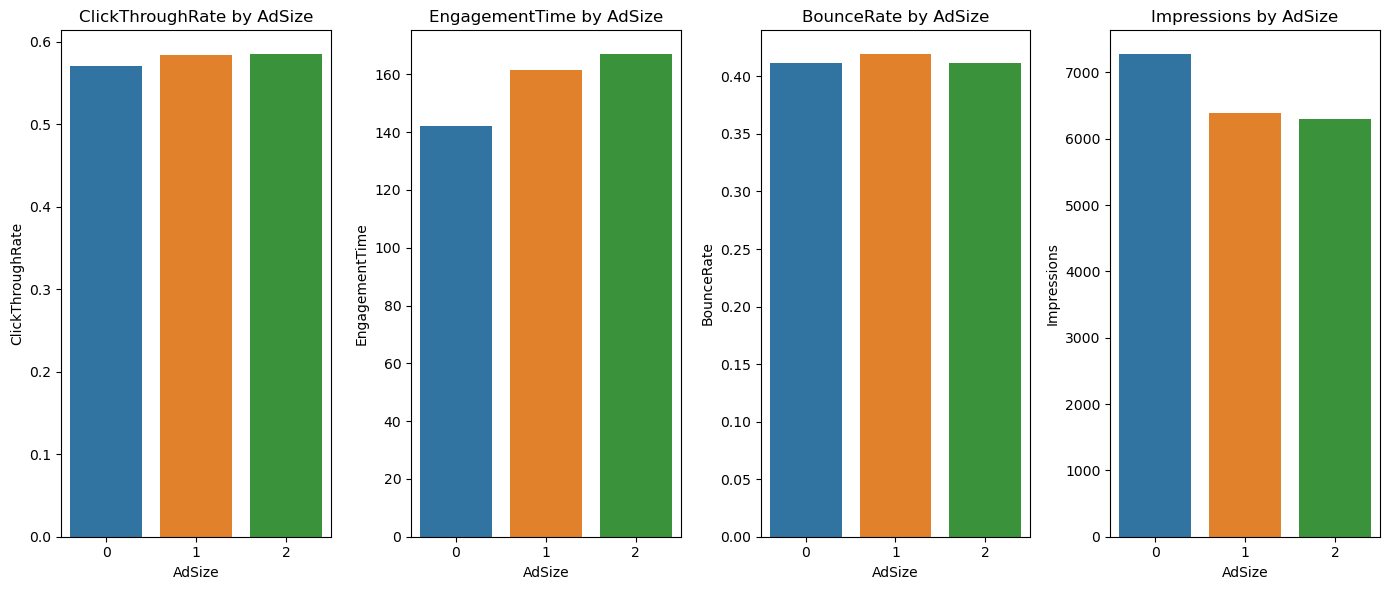

In [ ]:
# Device Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='DeviceUsed', y='ClickThroughRate', data=device_metrics, palette='tab10')
plt.title('ClickThroughRate by Device Used')
plt.subplot(1, 4, 2)
sns.barplot(x='DeviceUsed', y='EngagementTime', data=device_metrics, palette='tab10')
plt.title('EngagementTime by Device Used')
plt.subplot(1, 4, 3)
sns.barplot(x='DeviceUsed', y='BounceRate', data=device_metrics, palette='tab10')
plt.title('BounceRate by Device Used')
plt.subplot(1, 4, 4)
sns.barplot(x='DeviceUsed', y='Impressions', data=device_metrics, palette='tab10')
plt.title('Impressions by Device Used')
plt.tight_layout()
plt.show()

# Time Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='TimeOfDay', y='ClickThroughRate', data=time_metrics, palette='tab10')
plt.title('ClickThroughRate by Time of Day')
plt.subplot(1, 4, 2)
sns.barplot(x='TimeOfDay', y='EngagementTime', data=time_metrics, palette='tab10')
plt.title('EngagementTime by Time of Day')
plt.subplot(1, 4, 3)
sns.barplot(x='TimeOfDay', y='BounceRate', data=time_metrics, palette='tab10')
plt.title('BounceRate by Time of Day')
plt.subplot(1, 4, 4)
sns.barplot(x='TimeOfDay', y='Impressions', data=time_metrics, palette='tab10')
plt.title('Impressions by Time of Day')
plt.tight_layout()
plt.show()


# AdType Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdType', y='ClickThroughRate', data=adtype_metrics, palette='tab10')
plt.title('ClickThroughRate by AdType')
plt.subplot(1, 4, 2)
sns.barplot(x='AdType', y='EngagementTime', data=adtype_metrics, palette='tab10')
plt.title('EngagementTime by AdType')
plt.subplot(1, 4, 3)
sns.barplot(x='AdType', y='BounceRate', data=adtype_metrics, palette='tab10')
plt.title('BounceRate by AdType')
plt.subplot(1, 4, 4)
sns.barplot(x='AdType', y='Impressions', data=adtype_metrics, palette='tab10')
plt.title('Impressions by AdType')
plt.tight_layout()
plt.show()


# AdSize Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdSize', y='ClickThroughRate', data=adsize_metrics, palette='tab10')
plt.title('ClickThroughRate by AdSize')
plt.subplot(1, 4, 2)
sns.barplot(x='AdSize', y='EngagementTime', data=adsize_metrics, palette='tab10')
plt.title('EngagementTime by AdSize')
plt.subplot(1, 4, 3)
sns.barplot(x='AdSize', y='BounceRate', data=adsize_metrics, palette='tab10')
plt.title('BounceRate by AdSize')
plt.subplot(1, 4, 4)
sns.barplot(x='AdSize', y='Impressions', data=adsize_metrics, palette='tab10')
plt.title('Impressions by AdSize')
plt.tight_layout()
plt.show()

In [ ]:
cluster_0.head(5)

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,...,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser,Cluster,PCA1,PCA2,AgeGroup
1,18,1,3,1,0.621428,4325,243,0.607549,1,2,...,2,0,2,1,2,0,0,0.445627,0.240576,18-24
2,21,0,4,1,0.964882,5341,275,0.367844,1,0,...,2,0,0,3,1,3,0,1.917107,-0.231698,18-24
4,57,1,0,0,0.141314,6530,271,0.820659,0,2,...,2,1,0,2,2,3,0,1.121028,0.719822,55-64
8,54,2,0,0,0.597951,5100,65,0.027877,2,0,...,2,2,0,2,0,3,0,0.025855,0.278707,45-54
9,41,1,0,1,0.838286,4516,227,0.735142,2,2,...,2,2,1,0,2,2,0,0.486621,0.057424,35-44


# **Metrics Analysis by Cluster_1**

In [ ]:
summary_cluster_1

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,AdSize,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser,Cluster,PCA1,PCA2
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,233.000000,233.000000
mean,39.772532,1.472103,2.248927,0.785408,0.315101,4670.304721,136.227468,0.542796,1.257511,1.583691,1.064378,0.665236,1.072961,1.261803,1.497854,1.085837,2.158798,1.0,-1.151057,0.288774
std,14.067103,0.682505,1.354371,0.411423,0.244248,2661.998176,82.906858,0.285232,0.800187,1.346480,0.782443,0.787533,0.781686,0.762906,1.102991,0.831190,1.388258,0.0,0.683311,0.866955
min,18.000000,0.000000,0.000000,0.000000,0.000072,113.000000,7.000000,0.001772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-3.412258,-1.700952
25%,27.000000,1.000000,1.000000,1.000000,0.120217,2387.000000,63.000000,0.301497,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,-1.538550,-0.243826
50%,39.000000,2.000000,2.000000,1.000000,0.240262,4672.000000,126.000000,0.569794,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0,-1.017615,0.186852
75%,52.000000,2.000000,3.000000,1.000000,0.488405,6831.000000,197.000000,0.777154,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.0,-0.658343,0.775044
max,64.000000,2.000000,4.000000,1.000000,0.987998,9852.000000,298.000000,0.997336,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,1.0,-0.107015,3.229210


## Click Through Rate by Demographic Group and Location

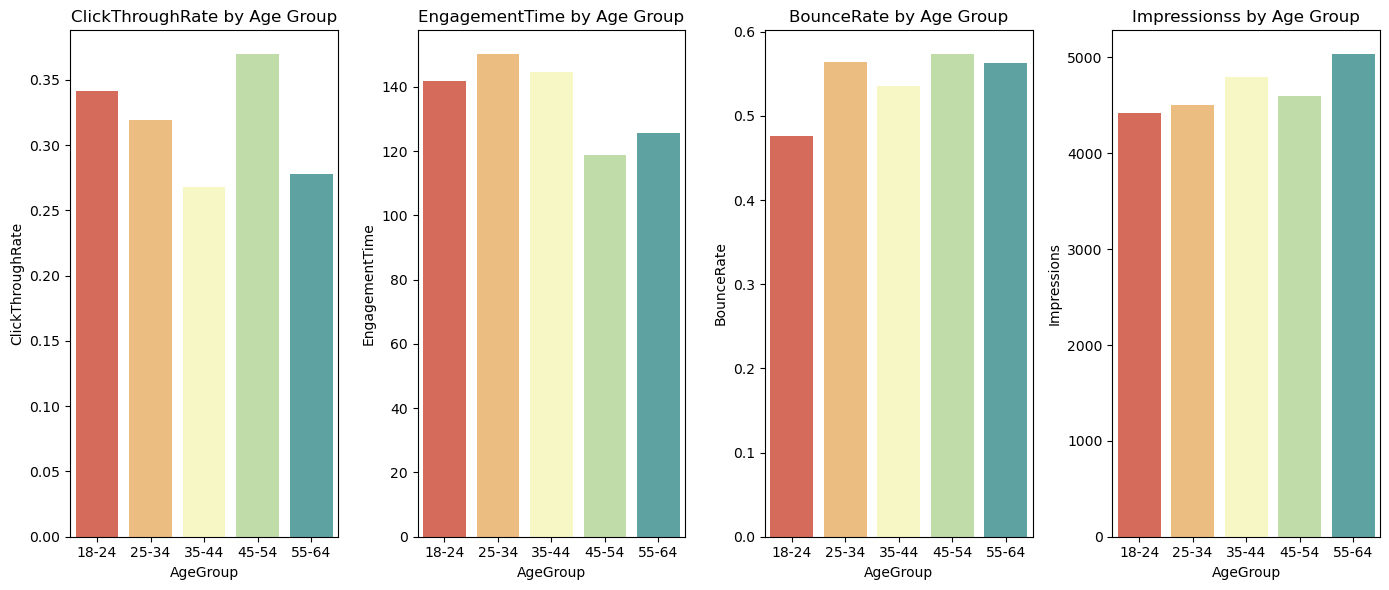

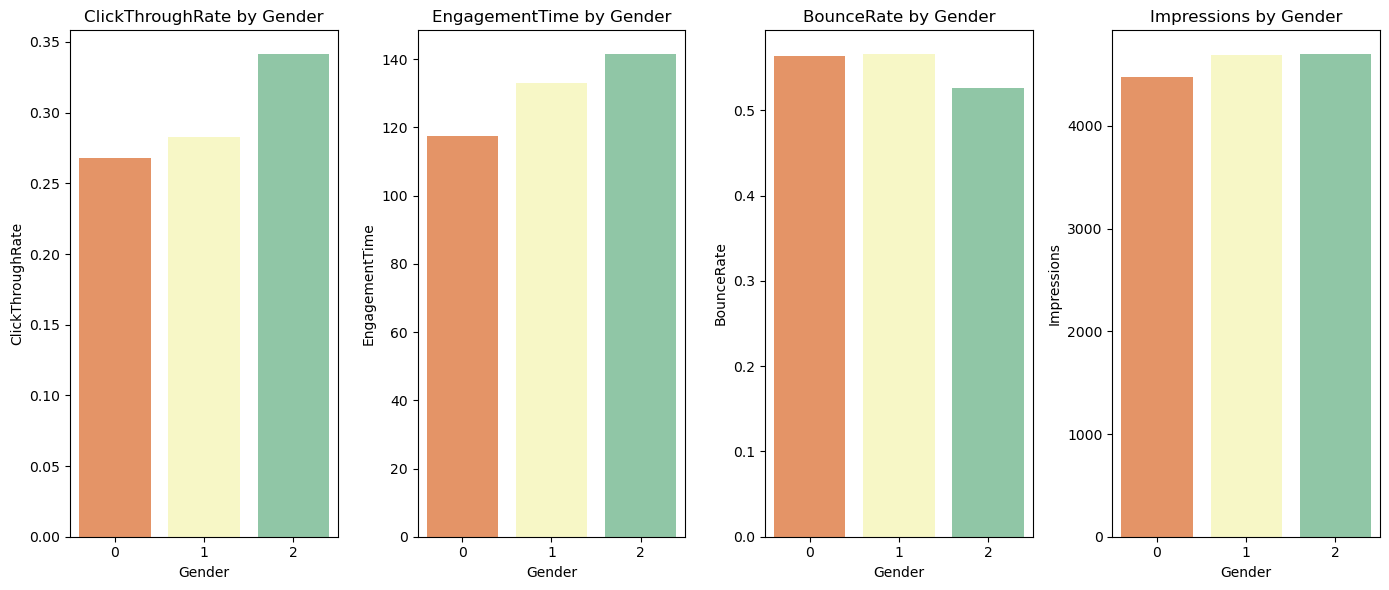

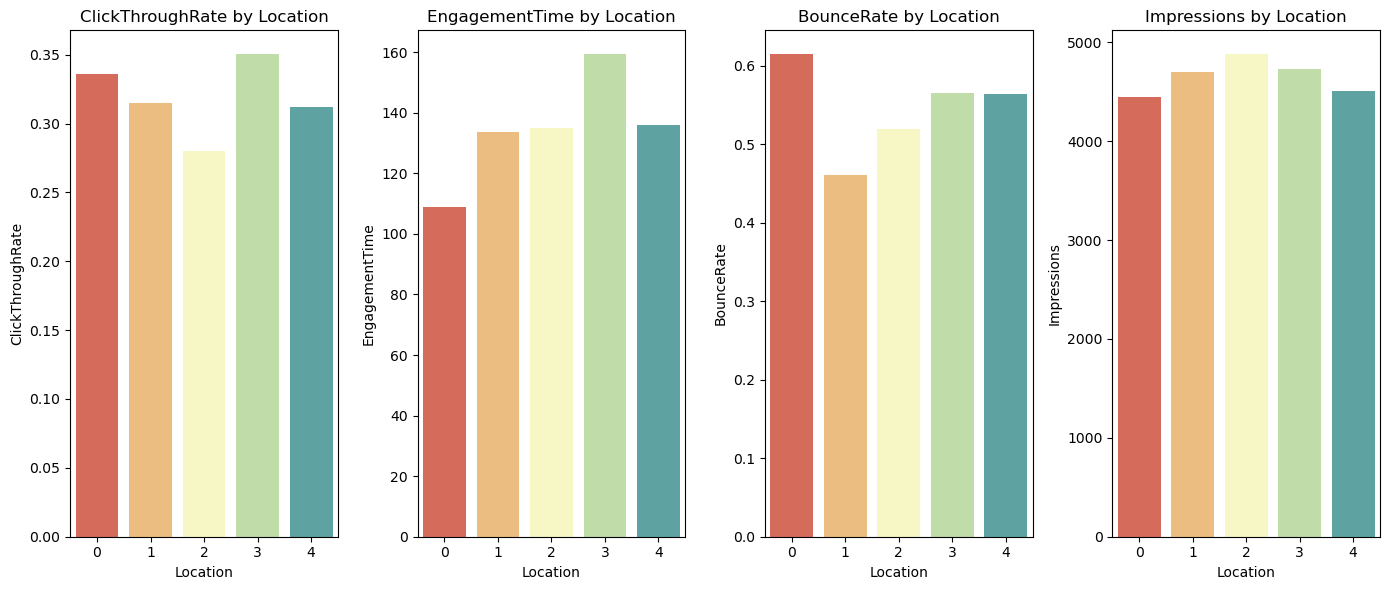

In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
cluster_1['AgeGroup'] = pd.cut(cluster_1['Age'], bins=bins, labels=labels, right=False)

# Demographic Preferences: ClickThroughRate, EngagementTime, BounceRate by Age Group
age_group_metrics = cluster_1.groupby('AgeGroup')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Gender-Based Analysis
gender_metrics = cluster_1.groupby('Gender')[['ClickThroughRate', 'EngagementTime', 'BounceRate', "Impressions"]].mean().reset_index()

# Geographic Preferences
location_metrics = cluster_1.groupby('Location')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Content Performance by Demographics (Age and Gender)
content_age_metrics = cluster_1.groupby(['ContentTopic', 'AgeGroup'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
content_gender_metrics = cluster_1.groupby(['ContentTopic', 'Gender'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Device and Time Impact
device_metrics = cluster_1.groupby('DeviceUsed')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
time_metrics = cluster_1.groupby('TimeOfDay')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# AdType and AdSize Impact
adtype_metrics = cluster_1.groupby('AdType')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
adsize_metrics = cluster_1.groupby('AdSize')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Plotting the results

# Age Group Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AgeGroup', y='ClickThroughRate', data=age_group_metrics, palette='Spectral')
plt.title('ClickThroughRate by Age Group')
plt.subplot(1, 4, 2)
sns.barplot(x='AgeGroup', y='EngagementTime', data=age_group_metrics, palette='Spectral')
plt.title('EngagementTime by Age Group')
plt.subplot(1, 4, 3)
sns.barplot(x='AgeGroup', y='BounceRate', data=age_group_metrics, palette='Spectral')
plt.title('BounceRate by Age Group')
plt.subplot(1, 4, 4)
sns.barplot(x='AgeGroup', y='Impressions', data=age_group_metrics, palette='Spectral')
plt.title('Impressionss by Age Group')
plt.tight_layout()
plt.show()

# Gender Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Gender', y='ClickThroughRate', data=gender_metrics, palette='Spectral')
plt.title('ClickThroughRate by Gender')
plt.subplot(1, 4, 2)
sns.barplot(x='Gender', y='EngagementTime', data=gender_metrics, palette='Spectral')
plt.title('EngagementTime by Gender')
plt.subplot(1, 4, 3)
sns.barplot(x='Gender', y='BounceRate', data=gender_metrics, palette='Spectral')
plt.title('BounceRate by Gender')
plt.subplot(1, 4, 4)
sns.barplot(x='Gender', y='Impressions', data=gender_metrics, palette='Spectral')
plt.title('Impressions by Gender')
plt.tight_layout()
plt.show()

# Location Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Location', y='ClickThroughRate', data=location_metrics, palette='Spectral')
plt.title('ClickThroughRate by Location')
plt.subplot(1, 4, 2)
sns.barplot(x='Location', y='EngagementTime', data=location_metrics, palette='Spectral')
plt.title('EngagementTime by Location')
plt.subplot(1, 4, 3)
sns.barplot(x='Location', y='BounceRate', data=location_metrics, palette='Spectral')
plt.title('BounceRate by Location')
plt.subplot(1, 4, 4)
sns.barplot(x='Location', y='Impressions', data=location_metrics, palette='Spectral')
plt.title('Impressions by Location')
plt.tight_layout()
plt.show()



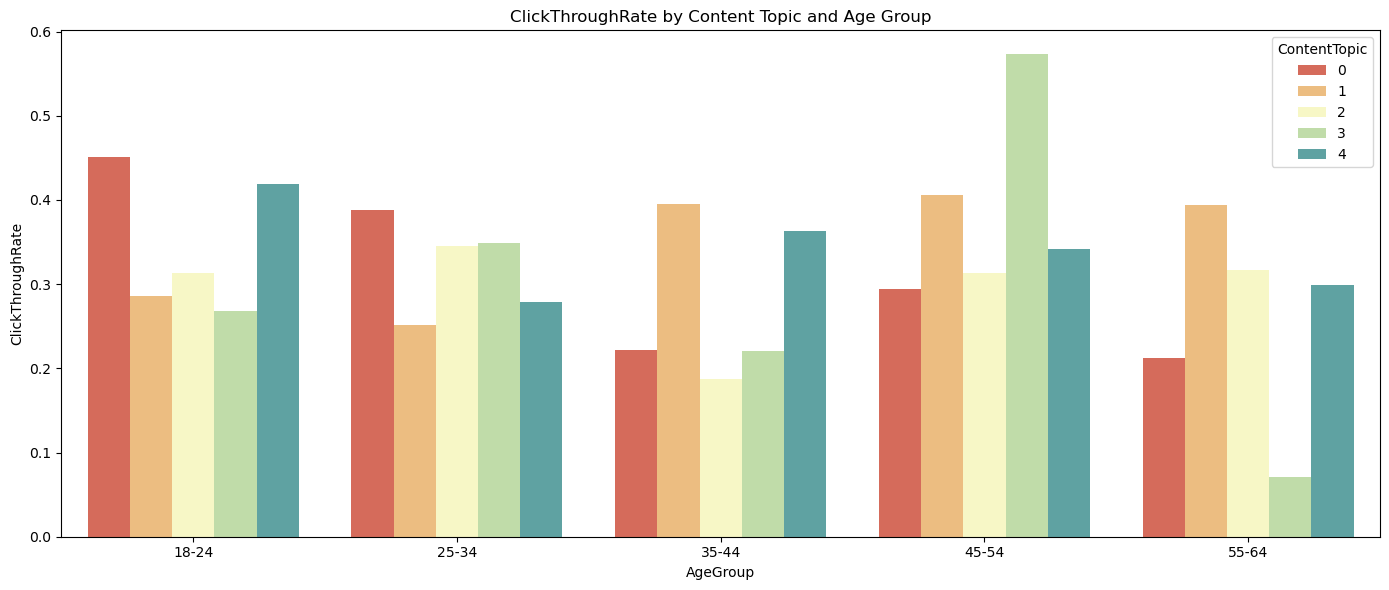

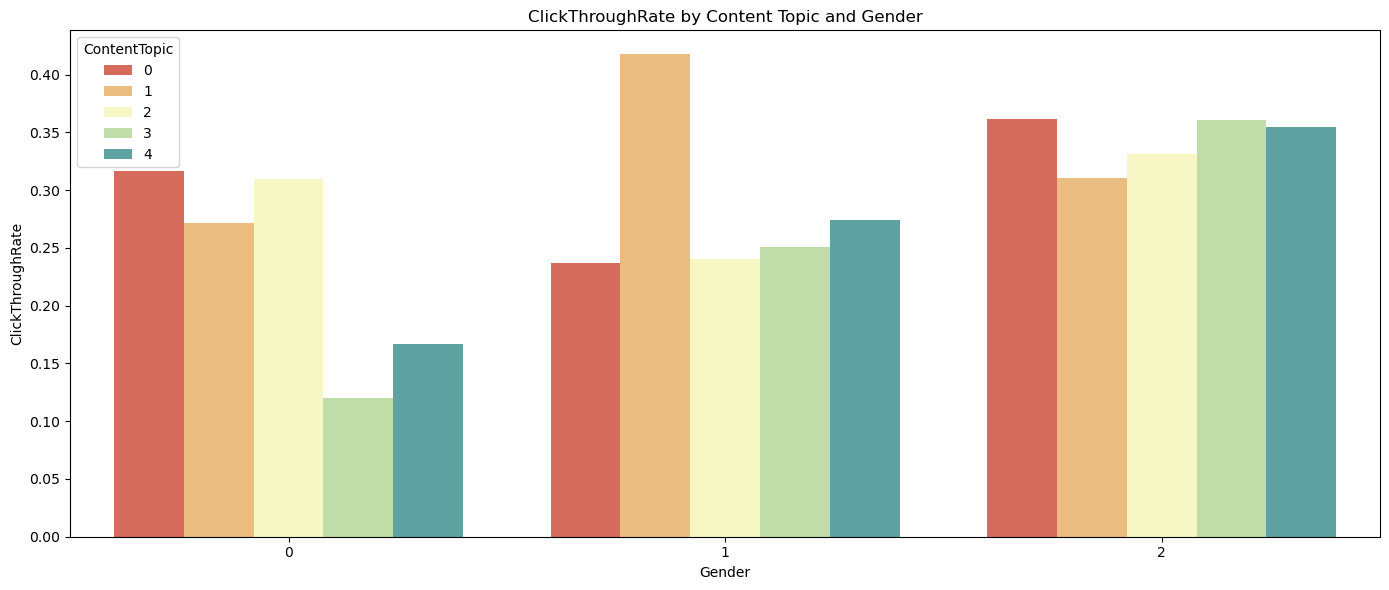

In [ ]:
# Content Performance by Age Group
plt.figure(figsize=(14, 6))
sns.barplot(x='AgeGroup', y='ClickThroughRate', hue='ContentTopic', data=content_age_metrics, palette='Spectral')
plt.title('ClickThroughRate by Content Topic and Age Group')
plt.tight_layout()
plt.show()

# Content Performance by Gender
plt.figure(figsize=(14, 6))
sns.barplot(x='Gender', y='ClickThroughRate', hue='ContentTopic', data=content_gender_metrics, palette='Spectral')
plt.title('ClickThroughRate by Content Topic and Gender')
plt.tight_layout()
plt.show()


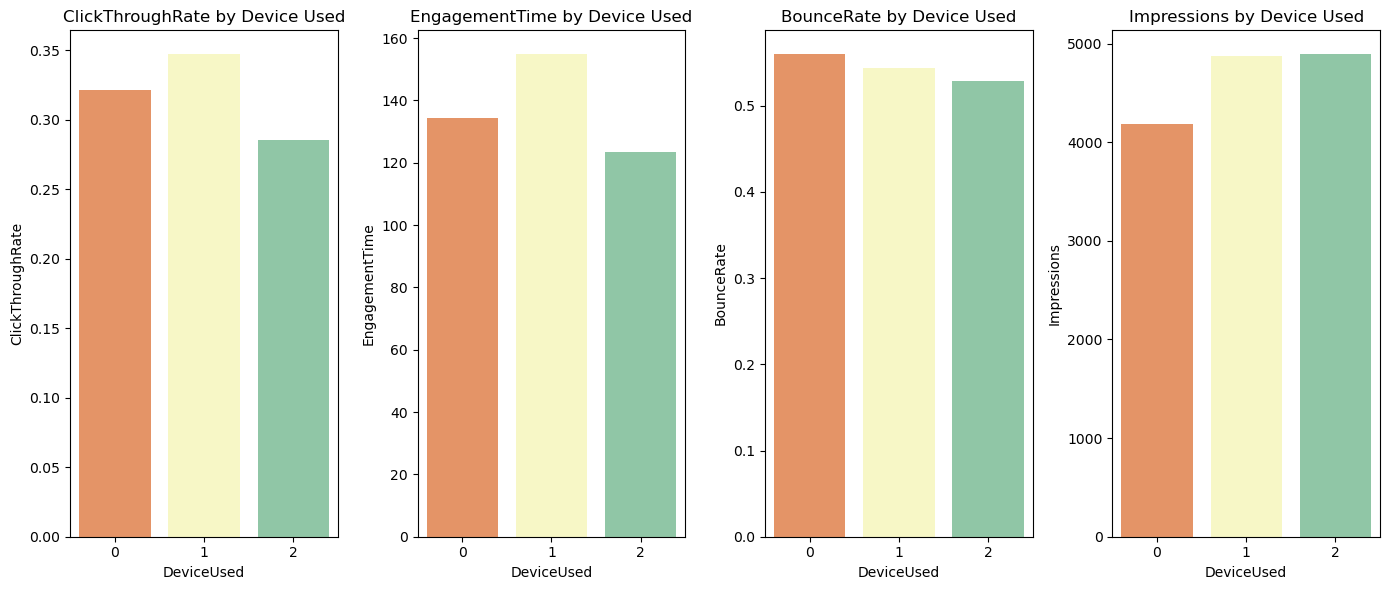

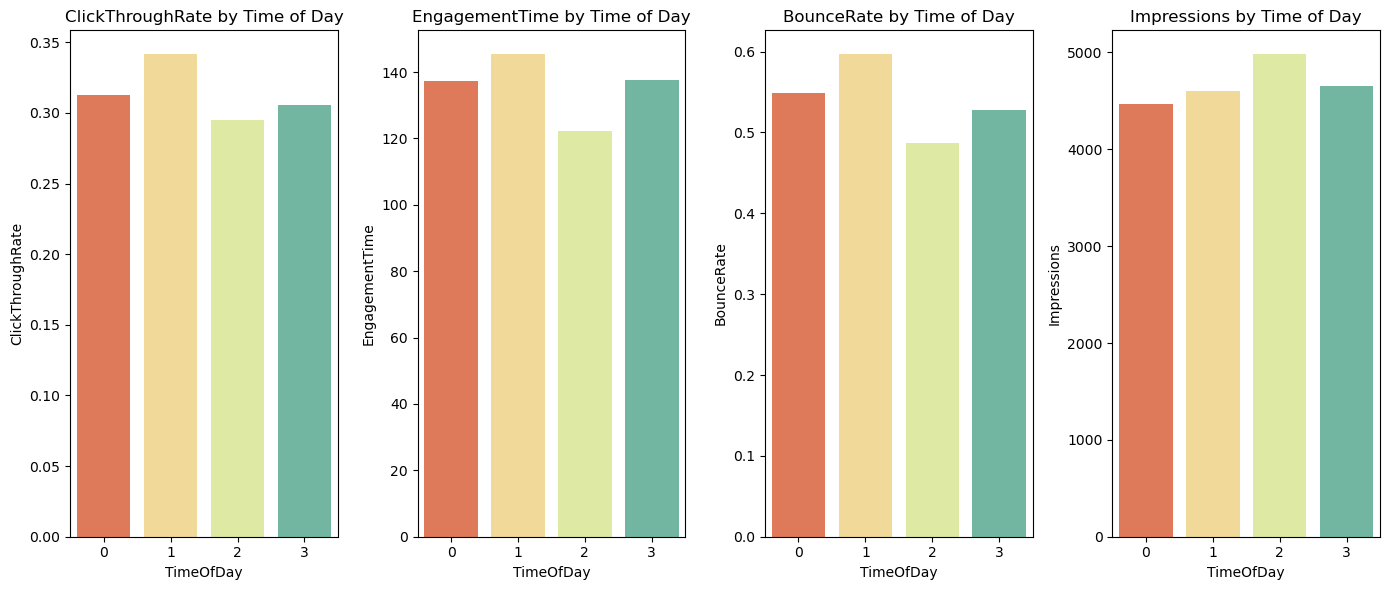

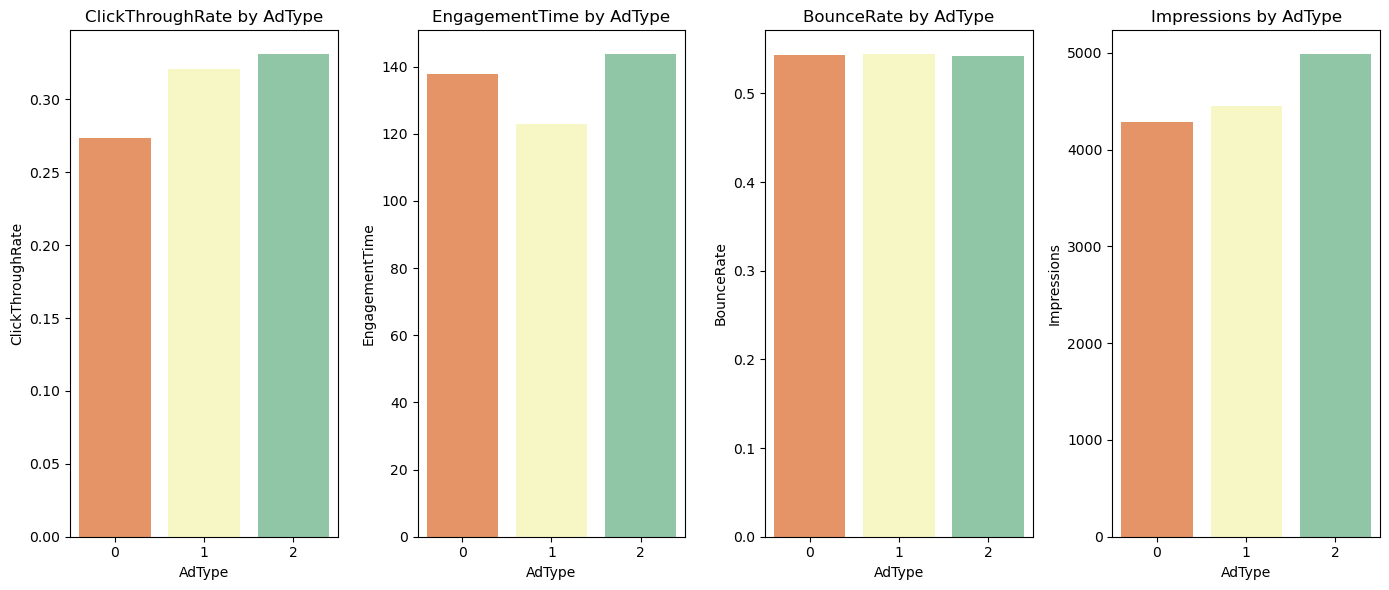

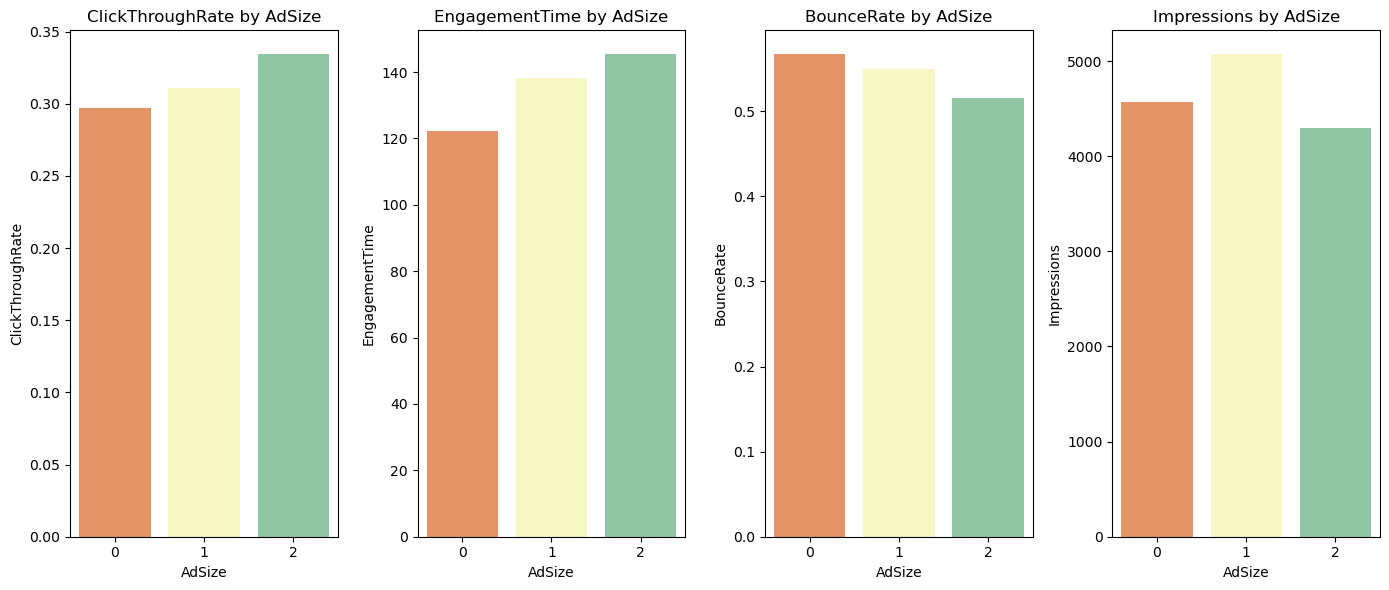

In [ ]:
# Device Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='DeviceUsed', y='ClickThroughRate', data=device_metrics, palette='Spectral')
plt.title('ClickThroughRate by Device Used')
plt.subplot(1, 4, 2)
sns.barplot(x='DeviceUsed', y='EngagementTime', data=device_metrics, palette='Spectral')
plt.title('EngagementTime by Device Used')
plt.subplot(1, 4, 3)
sns.barplot(x='DeviceUsed', y='BounceRate', data=device_metrics, palette='Spectral')
plt.title('BounceRate by Device Used')
plt.subplot(1, 4, 4)
sns.barplot(x='DeviceUsed', y='Impressions', data=device_metrics, palette='Spectral')
plt.title('Impressions by Device Used')
plt.tight_layout()
plt.show()

# Time Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='TimeOfDay', y='ClickThroughRate', data=time_metrics, palette='Spectral')
plt.title('ClickThroughRate by Time of Day')
plt.subplot(1, 4, 2)
sns.barplot(x='TimeOfDay', y='EngagementTime', data=time_metrics, palette='Spectral')
plt.title('EngagementTime by Time of Day')
plt.subplot(1, 4, 3)
sns.barplot(x='TimeOfDay', y='BounceRate', data=time_metrics, palette='Spectral')
plt.title('BounceRate by Time of Day')
plt.subplot(1, 4, 4)
sns.barplot(x='TimeOfDay', y='Impressions', data=time_metrics, palette='Spectral')
plt.title('Impressions by Time of Day')
plt.tight_layout()
plt.show()


# AdType Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdType', y='ClickThroughRate', data=adtype_metrics, palette='Spectral')
plt.title('ClickThroughRate by AdType')
plt.subplot(1, 4, 2)
sns.barplot(x='AdType', y='EngagementTime', data=adtype_metrics, palette='Spectral')
plt.title('EngagementTime by AdType')
plt.subplot(1, 4, 3)
sns.barplot(x='AdType', y='BounceRate', data=adtype_metrics, palette='Spectral')
plt.title('BounceRate by AdType')
plt.subplot(1, 4, 4)
sns.barplot(x='AdType', y='Impressions', data=adtype_metrics, palette='Spectral')
plt.title('Impressions by AdType')
plt.tight_layout()
plt.show()


# AdSize Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdSize', y='ClickThroughRate', data=adsize_metrics, palette='Spectral')
plt.title('ClickThroughRate by AdSize')
plt.subplot(1, 4, 2)
sns.barplot(x='AdSize', y='EngagementTime', data=adsize_metrics, palette='Spectral')
plt.title('EngagementTime by AdSize')
plt.subplot(1, 4, 3)
sns.barplot(x='AdSize', y='BounceRate', data=adsize_metrics, palette='Spectral')
plt.title('BounceRate by AdSize')
plt.subplot(1, 4, 4)
sns.barplot(x='AdSize', y='Impressions', data=adsize_metrics, palette='Spectral')
plt.title('Impressions by AdSize')
plt.tight_layout()
plt.show()

In [ ]:
cluster_1.head(5)

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,...,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser,Cluster,PCA1,PCA2,AgeGroup
3,21,1,1,1,0.646456,3069,74,0.995714,1,2,...,0,1,2,0,1,3,1,-0.997882,1.449064,18-24
5,27,2,3,1,0.161218,1211,72,0.926478,1,2,...,0,1,1,3,0,2,1,-2.772667,-1.286125,25-34
16,57,1,4,0,0.174083,6542,57,0.685537,0,4,...,1,2,2,0,0,3,1,-0.472791,-0.373505,55-64
18,64,2,0,1,0.173072,9436,12,0.724231,2,3,...,0,1,1,2,1,1,1,-1.930723,-0.437276,55-64
23,31,2,2,0,0.136043,1679,245,0.784413,1,4,...,0,0,2,1,1,1,1,-1.517413,0.441286,25-34


# **Metrics Analysis by Cluster_2**

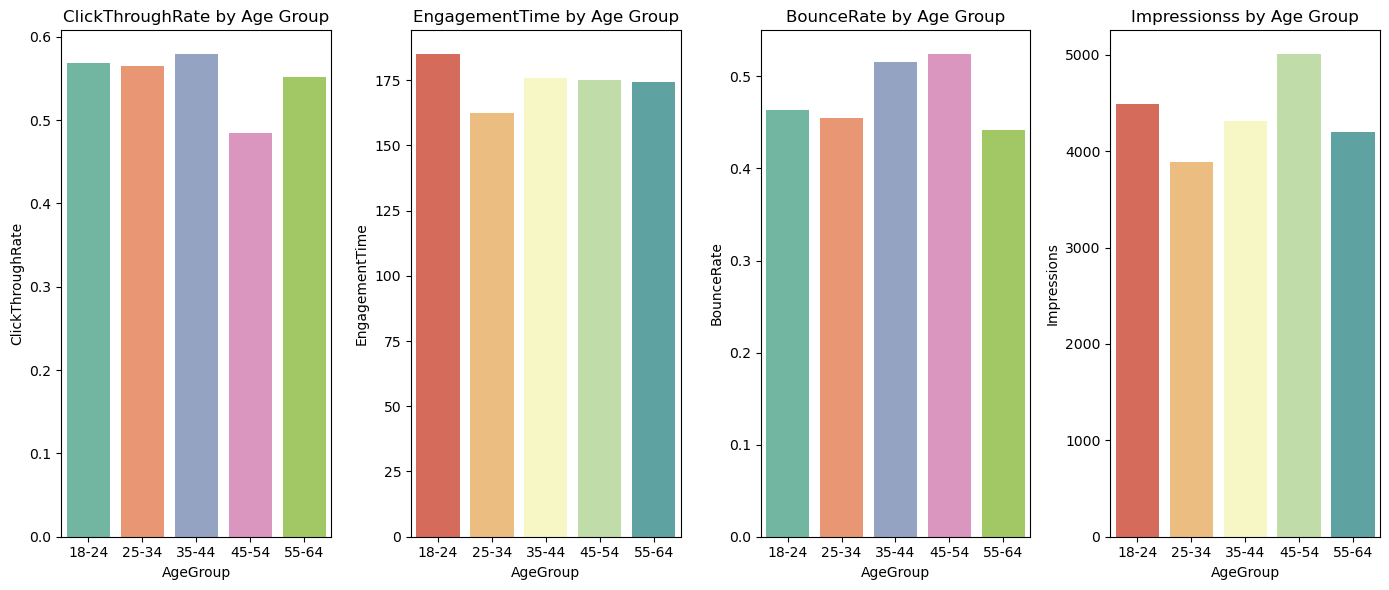

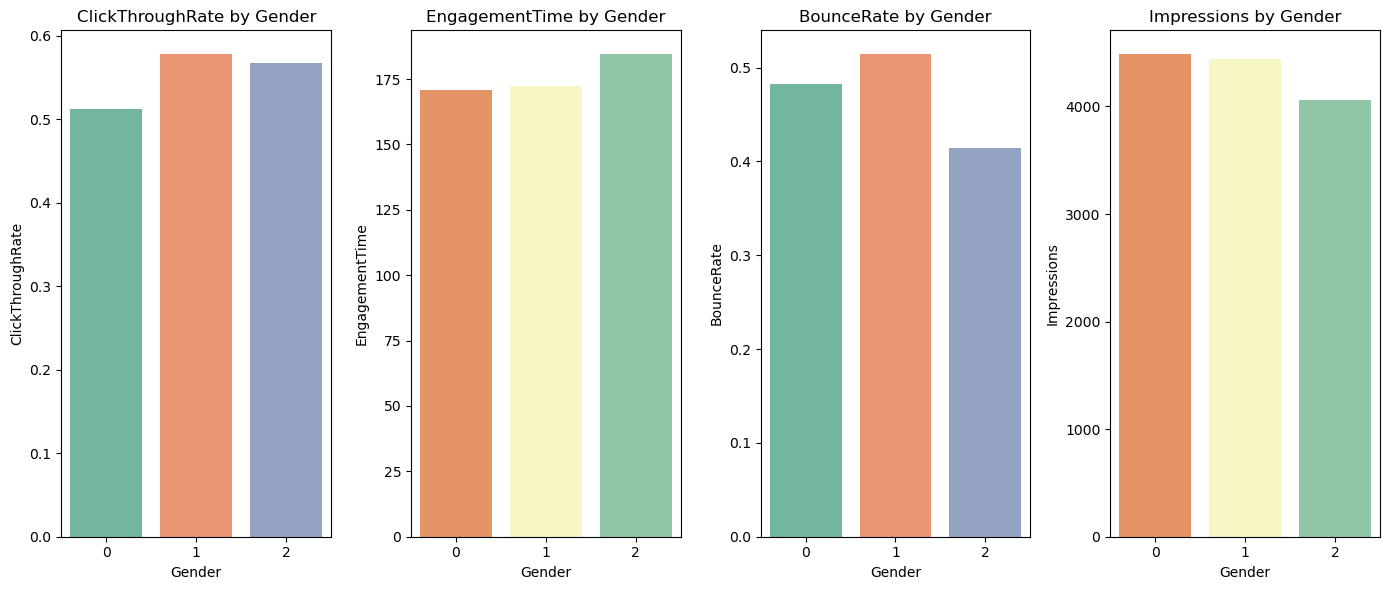

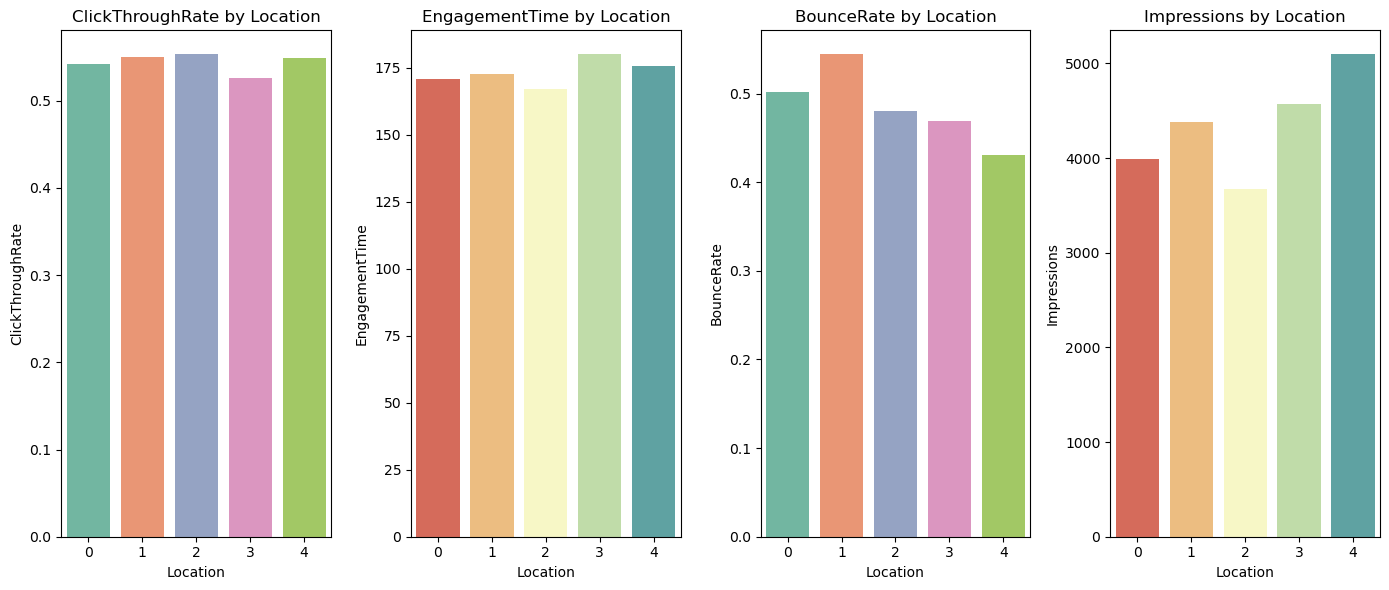

In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
cluster_2['AgeGroup'] = pd.cut(cluster_2['Age'], bins=bins, labels=labels, right=False)

# Demographic Preferences: ClickThroughRate, EngagementTime, BounceRate by Age Group
age_group_metrics = cluster_2.groupby('AgeGroup')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Gender-Based Analysis
gender_metrics = cluster_2.groupby('Gender')[['ClickThroughRate', 'EngagementTime', 'BounceRate', "Impressions"]].mean().reset_index()

# Geographic Preferences
location_metrics = cluster_2.groupby('Location')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Content Performance by Demographics (Age and Gender)
content_age_metrics = cluster_2.groupby(['ContentTopic', 'AgeGroup'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
content_gender_metrics = cluster_2.groupby(['ContentTopic', 'Gender'])[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Device and Time Impact
device_metrics = cluster_2.groupby('DeviceUsed')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
time_metrics = cluster_2.groupby('TimeOfDay')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# AdType and AdSize Impact
adtype_metrics = cluster_2.groupby('AdType')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()
adsize_metrics = cluster_2.groupby('AdSize')[['ClickThroughRate', 'EngagementTime', 'BounceRate', 'Impressions']].mean().reset_index()

# Plotting the results

# Age Group Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AgeGroup', y='ClickThroughRate', data=age_group_metrics, palette='Set2')
plt.title('ClickThroughRate by Age Group')
plt.subplot(1, 4, 2)
sns.barplot(x='AgeGroup', y='EngagementTime', data=age_group_metrics, palette='Spectral')
plt.title('EngagementTime by Age Group')
plt.subplot(1, 4, 3)
sns.barplot(x='AgeGroup', y='BounceRate', data=age_group_metrics, palette='Set2')
plt.title('BounceRate by Age Group')
plt.subplot(1, 4, 4)
sns.barplot(x='AgeGroup', y='Impressions', data=age_group_metrics, palette='Spectral')
plt.title('Impressionss by Age Group')
plt.tight_layout()
plt.show()

# Gender Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Gender', y='ClickThroughRate', data=gender_metrics, palette='Set2')
plt.title('ClickThroughRate by Gender')
plt.subplot(1, 4, 2)
sns.barplot(x='Gender', y='EngagementTime', data=gender_metrics, palette='Spectral')
plt.title('EngagementTime by Gender')
plt.subplot(1, 4, 3)
sns.barplot(x='Gender', y='BounceRate', data=gender_metrics, palette='Set2')
plt.title('BounceRate by Gender')
plt.subplot(1, 4, 4)
sns.barplot(x='Gender', y='Impressions', data=gender_metrics, palette='Spectral')
plt.title('Impressions by Gender')
plt.tight_layout()
plt.show()

# Location Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='Location', y='ClickThroughRate', data=location_metrics, palette='Set2')
plt.title('ClickThroughRate by Location')
plt.subplot(1, 4, 2)
sns.barplot(x='Location', y='EngagementTime', data=location_metrics, palette='Spectral')
plt.title('EngagementTime by Location')
plt.subplot(1, 4, 3)
sns.barplot(x='Location', y='BounceRate', data=location_metrics, palette='Set2')
plt.title('BounceRate by Location')
plt.subplot(1, 4, 4)
sns.barplot(x='Location', y='Impressions', data=location_metrics, palette='Spectral')
plt.title('Impressions by Location')
plt.tight_layout()
plt.show()



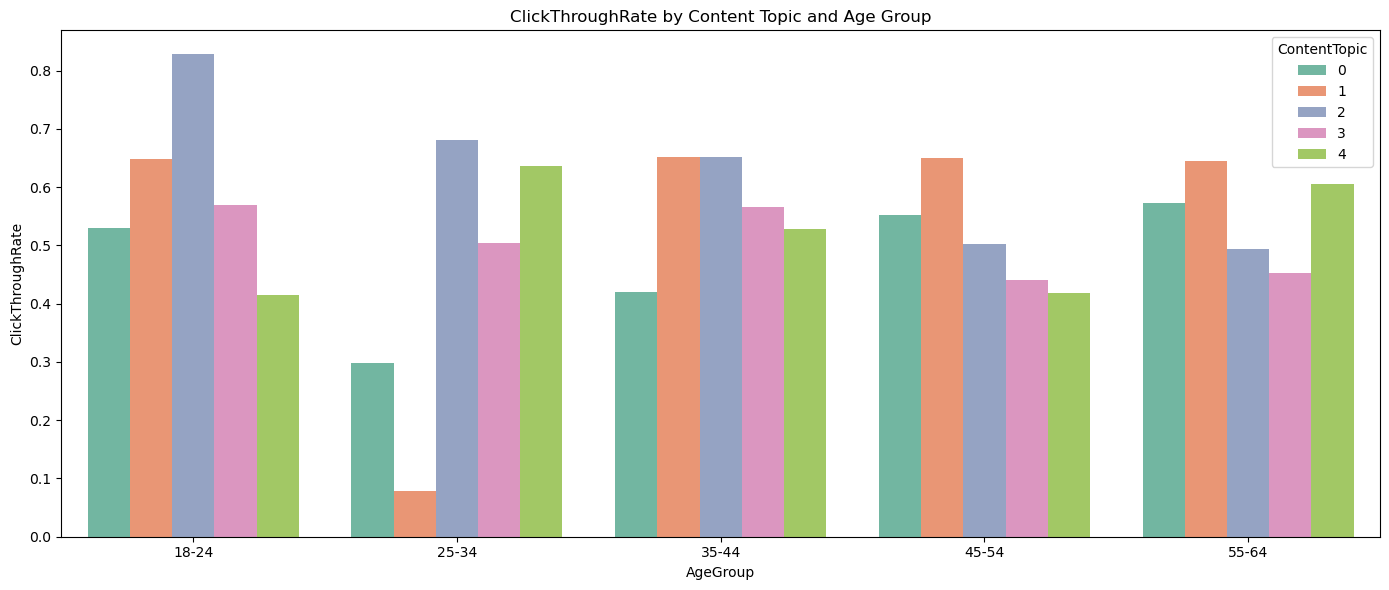

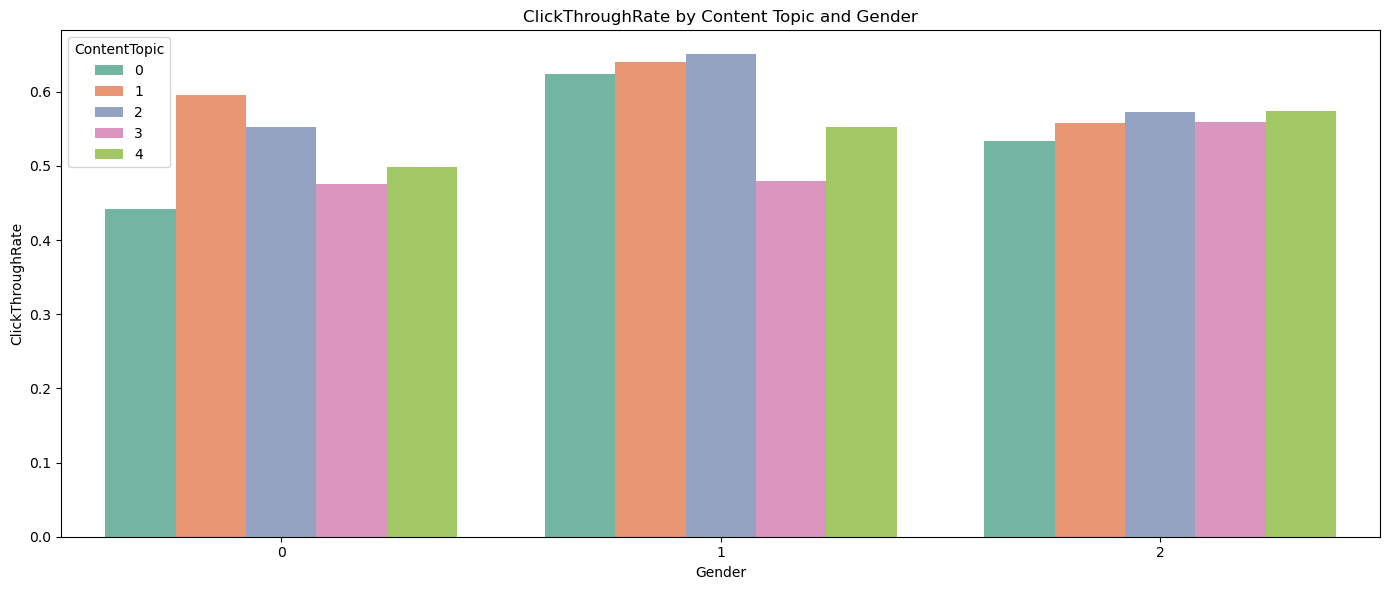

In [ ]:
# Content Performance by Age Group
plt.figure(figsize=(14, 6))
sns.barplot(x='AgeGroup', y='ClickThroughRate', hue='ContentTopic', data=content_age_metrics, palette='Set2')
plt.title('ClickThroughRate by Content Topic and Age Group')
plt.tight_layout()
plt.show()

# Content Performance by Gender
plt.figure(figsize=(14, 6))
sns.barplot(x='Gender', y='ClickThroughRate', hue='ContentTopic', data=content_gender_metrics, palette='Set2')
plt.title('ClickThroughRate by Content Topic and Gender')
plt.tight_layout()
plt.show()

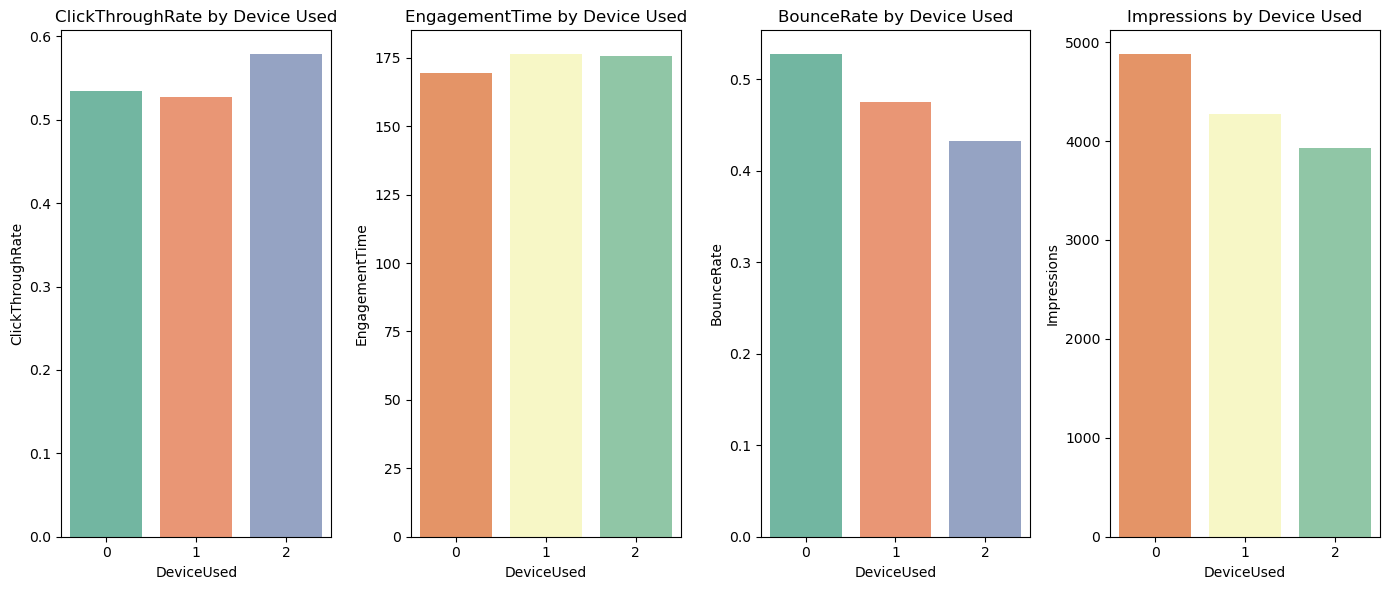

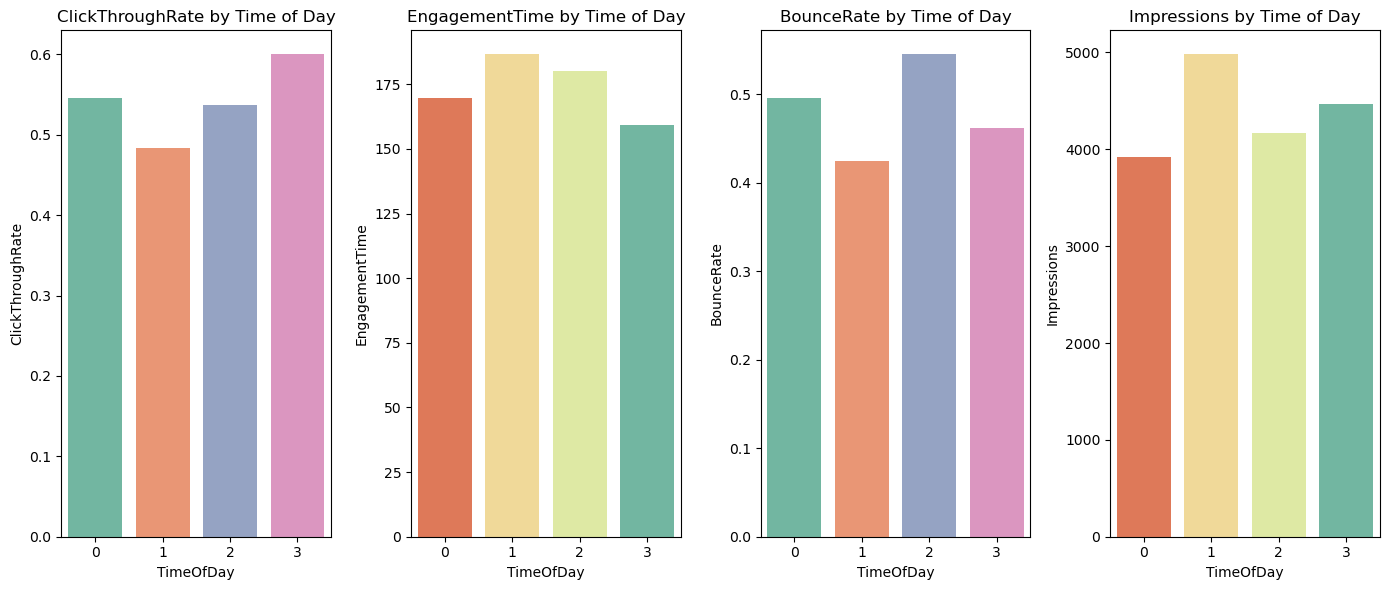

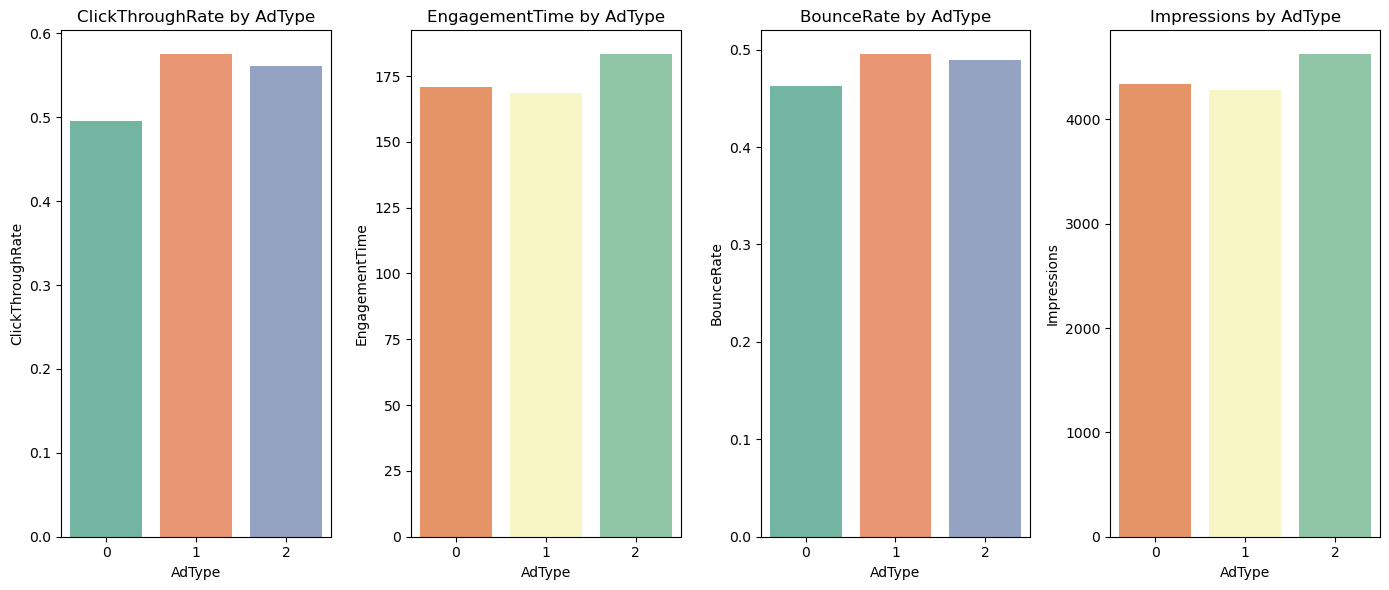

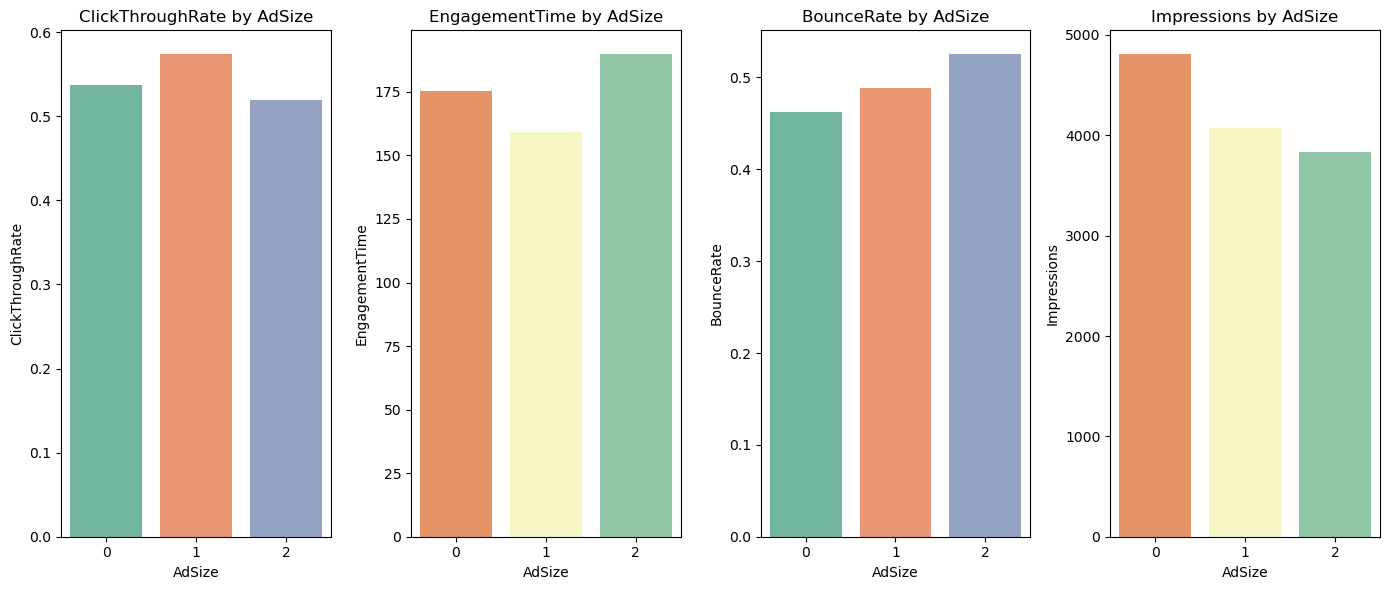

In [ ]:
# Device Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='DeviceUsed', y='ClickThroughRate', data=device_metrics, palette='Set2')
plt.title('ClickThroughRate by Device Used')
plt.subplot(1, 4, 2)
sns.barplot(x='DeviceUsed', y='EngagementTime', data=device_metrics, palette='Spectral')
plt.title('EngagementTime by Device Used')
plt.subplot(1, 4, 3)
sns.barplot(x='DeviceUsed', y='BounceRate', data=device_metrics, palette='Set2')
plt.title('BounceRate by Device Used')
plt.subplot(1, 4, 4)
sns.barplot(x='DeviceUsed', y='Impressions', data=device_metrics, palette='Spectral')
plt.title('Impressions by Device Used')
plt.tight_layout()
plt.show()

# Time Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='TimeOfDay', y='ClickThroughRate', data=time_metrics, palette='Set2')
plt.title('ClickThroughRate by Time of Day')
plt.subplot(1, 4, 2)
sns.barplot(x='TimeOfDay', y='EngagementTime', data=time_metrics, palette='Spectral')
plt.title('EngagementTime by Time of Day')
plt.subplot(1, 4, 3)
sns.barplot(x='TimeOfDay', y='BounceRate', data=time_metrics, palette='Set2')
plt.title('BounceRate by Time of Day')
plt.subplot(1, 4, 4)
sns.barplot(x='TimeOfDay', y='Impressions', data=time_metrics, palette='Spectral')
plt.title('Impressions by Time of Day')
plt.tight_layout()
plt.show()


# AdType Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdType', y='ClickThroughRate', data=adtype_metrics, palette='Set2')
plt.title('ClickThroughRate by AdType')
plt.subplot(1, 4, 2)
sns.barplot(x='AdType', y='EngagementTime', data=adtype_metrics, palette='Spectral')
plt.title('EngagementTime by AdType')
plt.subplot(1, 4, 3)
sns.barplot(x='AdType', y='BounceRate', data=adtype_metrics, palette='Set2')
plt.title('BounceRate by AdType')
plt.subplot(1, 4, 4)
sns.barplot(x='AdType', y='Impressions', data=adtype_metrics, palette='Spectral')
plt.title('Impressions by AdType')
plt.tight_layout()
plt.show()


# AdSize Metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 4, 1)
sns.barplot(x='AdSize', y='ClickThroughRate', data=adsize_metrics, palette='Set2')
plt.title('ClickThroughRate by AdSize')
plt.subplot(1, 4, 2)
sns.barplot(x='AdSize', y='EngagementTime', data=adsize_metrics, palette='Spectral')
plt.title('EngagementTime by AdSize')
plt.subplot(1, 4, 3)
sns.barplot(x='AdSize', y='BounceRate', data=adsize_metrics, palette='Set2')
plt.title('BounceRate by AdSize')
plt.subplot(1, 4, 4)
sns.barplot(x='AdSize', y='Impressions', data=adsize_metrics, palette='Spectral')
plt.title('Impressions by AdSize')
plt.tight_layout()
plt.show()

In [ ]:
cluster_2.head(5)

,Age,Gender,Location,EducationLevel,ClickThroughRate,Impressions,EngagementTime,BounceRate,AdType,ContentTopic,...,PurchaseHistory,BrowsingBehavior,SiteNavigationPatterns,TimeOfDay,DeviceUsed,InternetBrowser,Cluster,PCA1,PCA2,AgeGroup
0,62,0,3,1,0.705780,6319,155,0.097799,2,1,...,0,2,0,1,2,1,2,0.007315,-1.628626,55-64
7,39,0,0,0,0.191174,5013,185,0.624730,0,1,...,1,2,0,2,1,1,2,0.888603,-1.164599,35-44
15,56,0,2,1,0.595669,2721,134,0.022403,2,2,...,2,2,2,1,2,1,2,0.306508,-0.504117,55-64
17,41,0,4,1,0.476540,6159,127,0.448659,1,4,...,0,2,1,2,0,4,2,-0.217173,-0.810716,35-44
33,42,0,3,0,0.352596,7956,169,0.898908,2,3,...,1,1,1,1,0,0,2,0.133911,-0.961887,35-44
